## 1. Importando bibliotecas

In [1]:
import math
import datetime
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib        as mpl
import pandas            as pd
import seaborn           as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from category_encoders import TargetEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, ShuffleSplit
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, \
HistGradientBoostingClassifier,StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, f1_score, make_scorer, accuracy_score, precision_score, recall_score, auc
import pickle
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.feature_selection import VarianceThreshold
import random
import gc
# Definindo a semente
random.seed(123)

## 2. Leitura da base de dados

In [2]:
df_churn = pd.read_csv('../df_churn_com_cluster.csv')
#df_churn = df_churn.drop(columns='Unnamed: 0')
df_churn.head()

,ClientId,DataExtracao,Score_Credito,Estado,Gênero,Idade,Tempo_Cliente,Limite_Credito_Mercado,Qte_Categorias,Usa_Cartao_Credito,Programa_Fidelidade,Sum_Pedidos_Acumulados,DataUltimaTransacao,DiasDesdeUltTransacao,Target,Cluster,TARGET
0,345568,2019-06-30,619,São Paulo,Feminino,42,2,0.0000,1,1,1,422.287000,2019-09-14,46,1,1,1
1,345569,2019-06-30,608,Rio de Janeiro,Feminino,41,1,838.0786,1,0,1,468.927417,2019-10-05,25,0,1,0
2,345570,2019-06-30,502,São Paulo,Feminino,42,8,1596.6080,3,1,0,474.714875,2019-08-20,71,1,3,1
3,345571,2019-06-30,699,São Paulo,Feminino,39,1,0.0000,2,0,0,390.944292,2019-10-21,9,0,1,0
4,345572,2019-06-30,850,Rio de Janeiro,Feminino,43,2,1255.1082,1,1,1,329.517083,2019-10-26,4,0,1,0


In [3]:
X = df_churn.drop(columns=['ClientId', 'DataExtracao', 'DataUltimaTransacao', 'DiasDesdeUltTransacao','Target', 'TARGET'])

cat_attributes = X.select_dtypes(include='object')
num_attributes = X.select_dtypes(exclude='object')

vars1 = list(cat_attributes.columns).copy()

vars2 = ['Usa_Cartao_Credito','Qte_Categorias', 'Programa_Fidelidade', 'Cluster']

vars_categoricas = vars1 + vars2

vars_numericas = list(set(df_churn.columns) - set(vars_categoricas) - set(['ClientId', 'DataExtracao', 'DataUltimaTransacao', 'DiasDesdeUltTransacao','Target', 'TARGET']))

In [4]:
vars_numericas

['Idade',
 'Tempo_Cliente',
 'Sum_Pedidos_Acumulados',
 'Limite_Credito_Mercado',
 'Score_Credito']

In [5]:
vars_categoricas

['Estado',
 'Gênero',
 'Usa_Cartao_Credito',
 'Qte_Categorias',
 'Programa_Fidelidade',
 'Cluster']

## Análise das variáveis categóricas

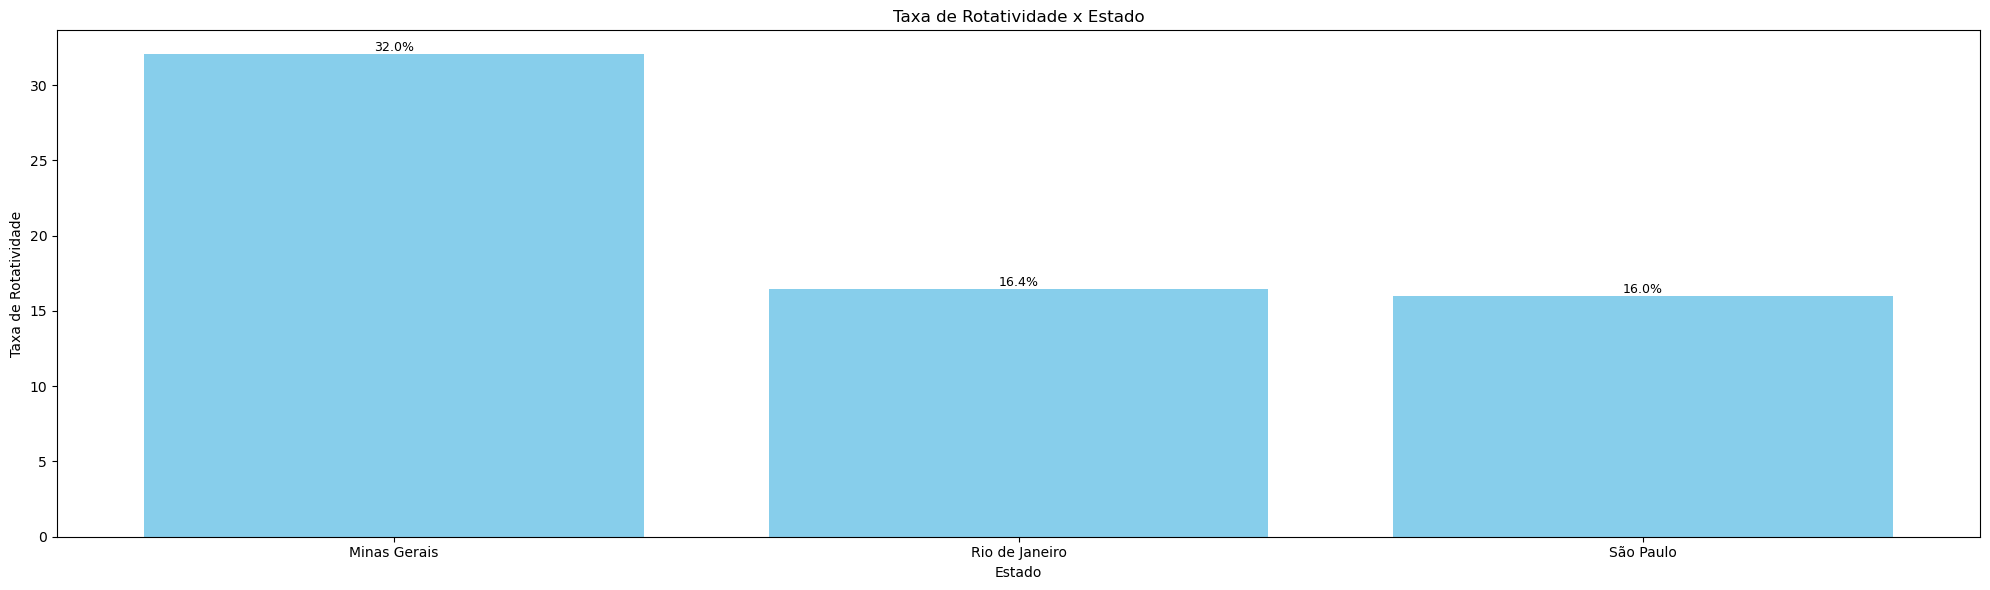

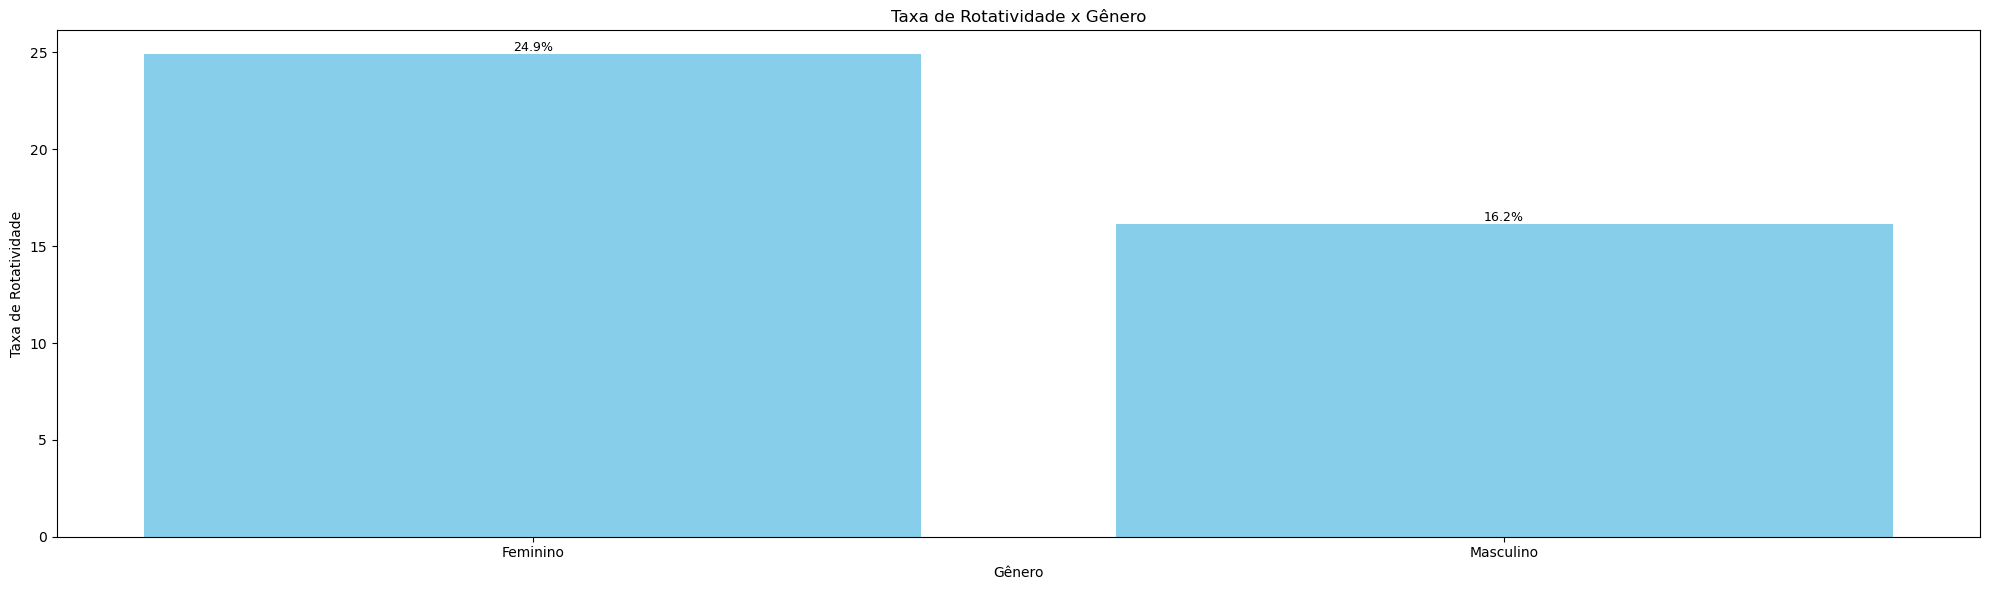

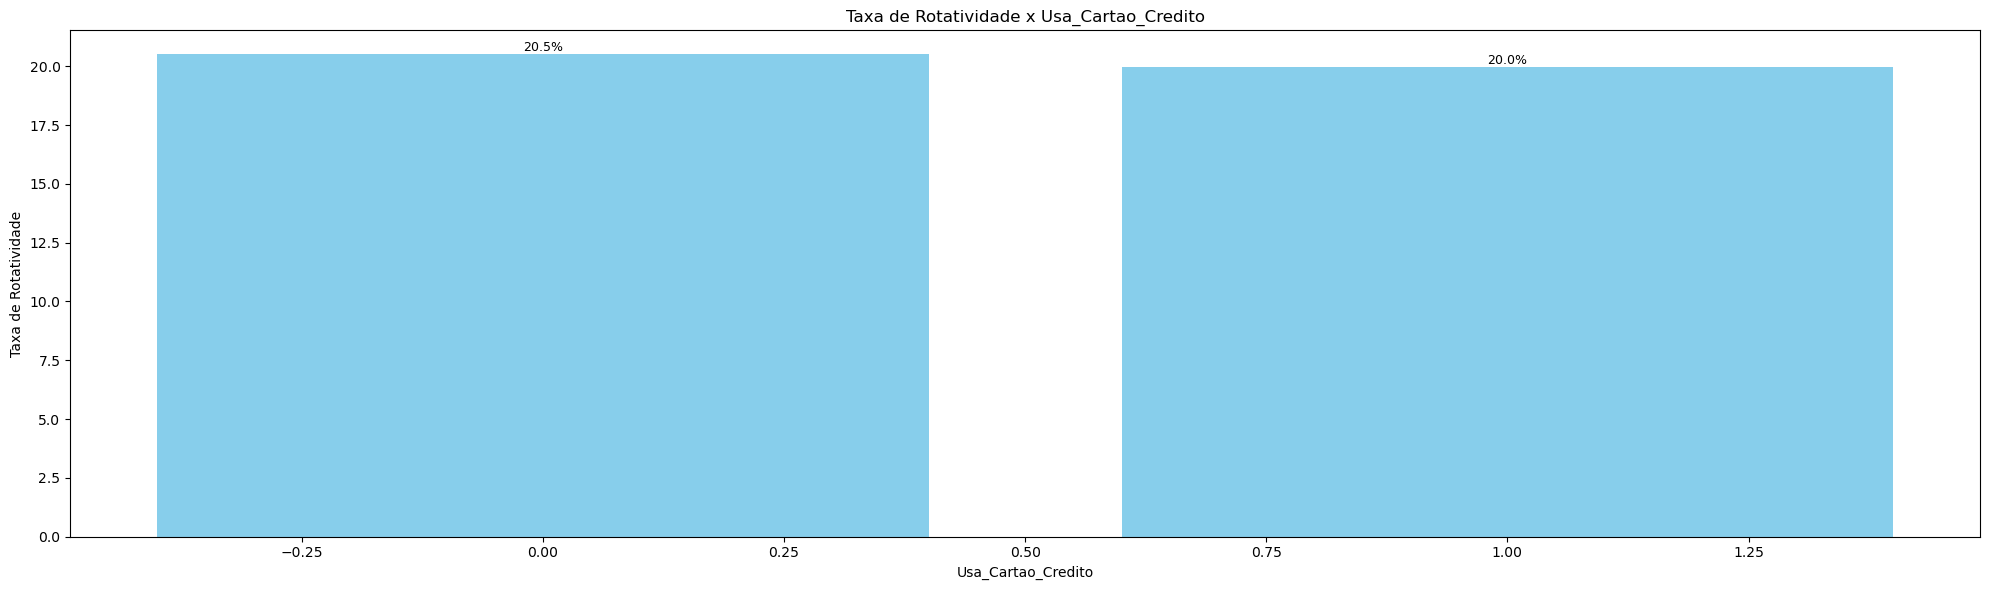

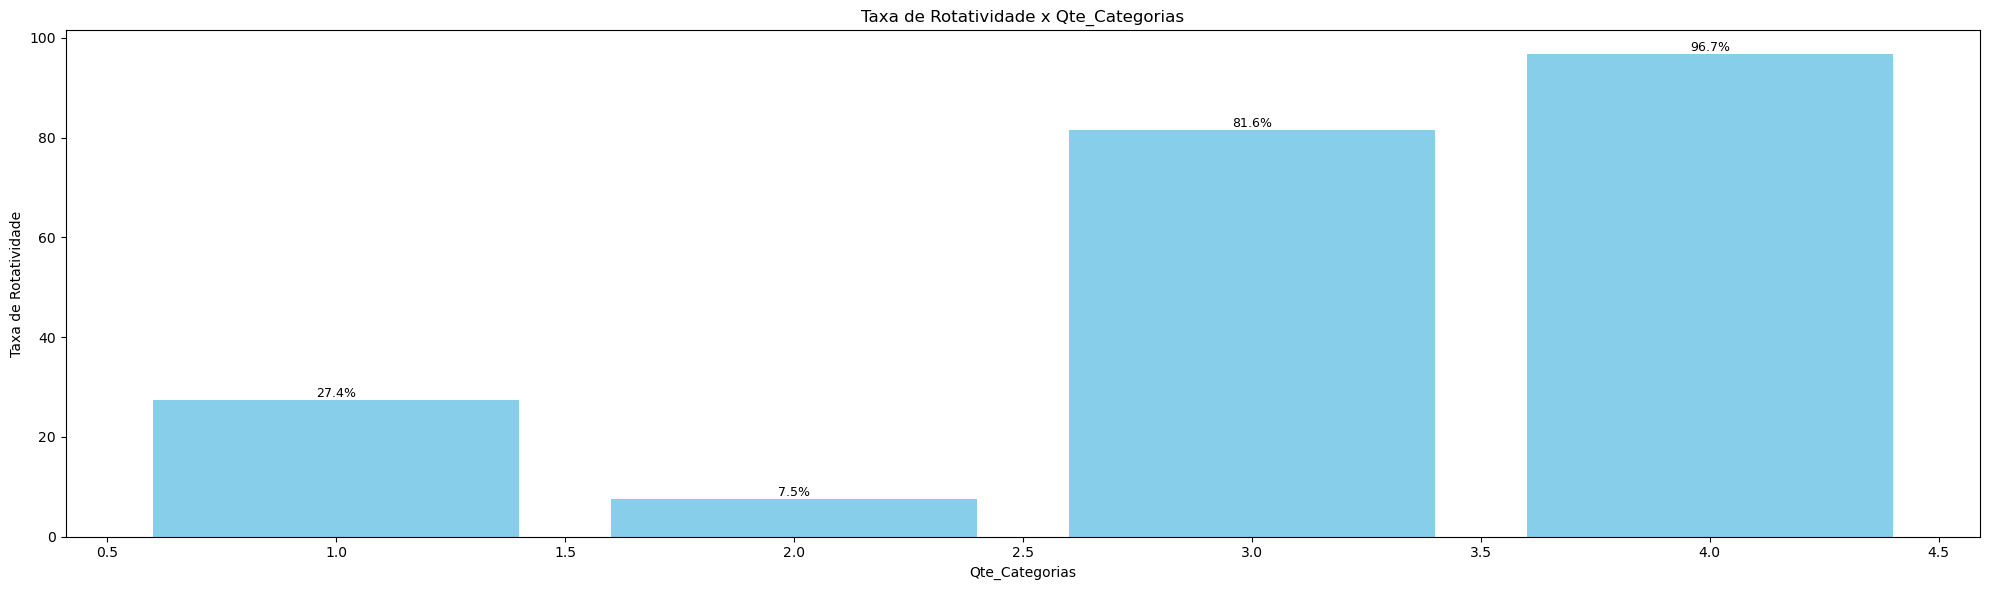

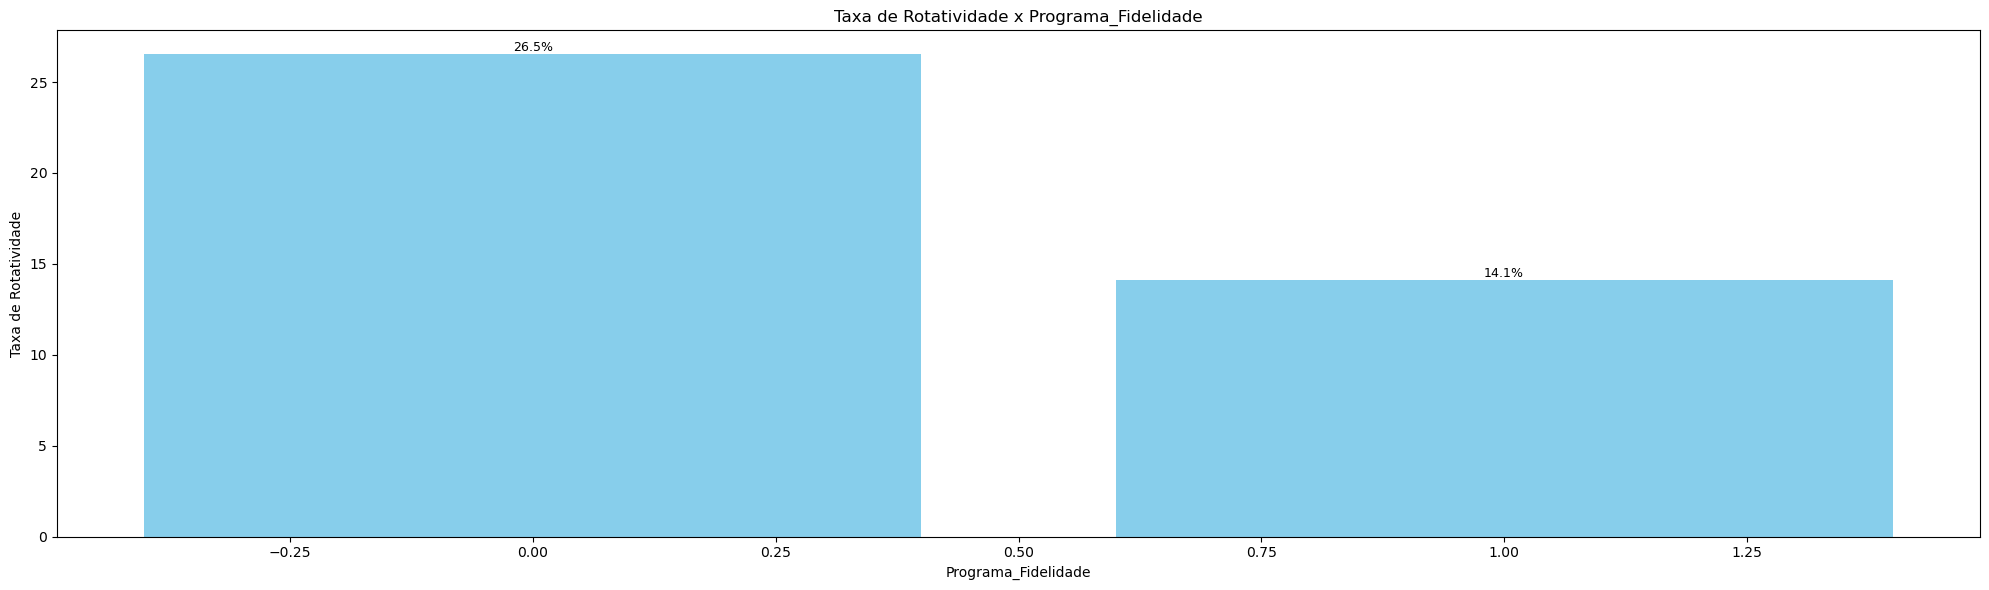

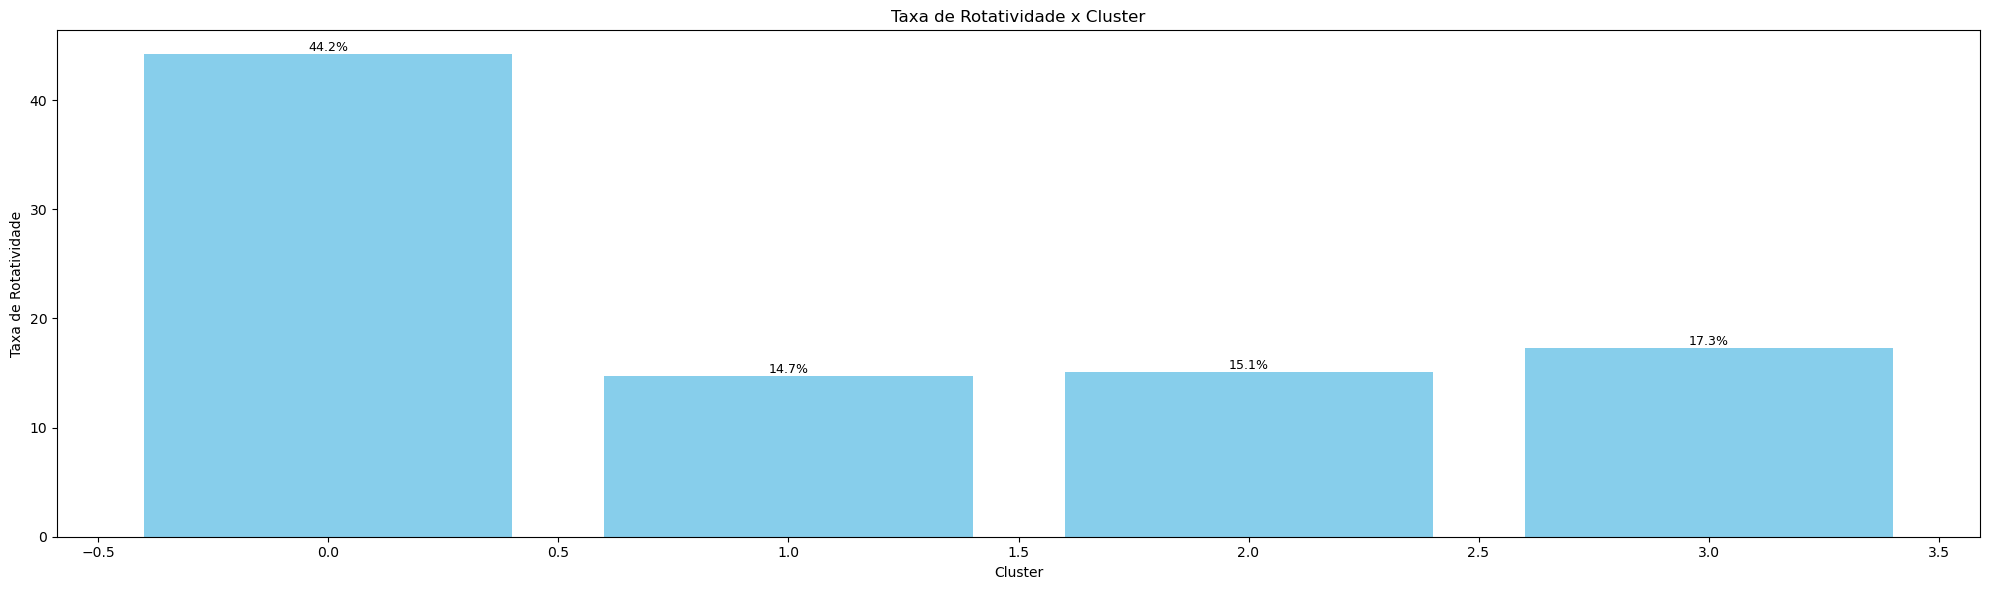

In [6]:
# Variáveis a serem analisadas:
for var in vars_categoricas:

  percentual_por_categoria = df_churn.groupby(var)['Target'].mean() * 100

  percentual_por_categoria = percentual_por_categoria.sort_values(ascending=False)

  plt.figure(figsize=(20, 6))
  bars = plt.bar(percentual_por_categoria.index, percentual_por_categoria.values, color='skyblue')

  for bar in bars:
      height = bar.get_height()
      plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

  plt.title(f'Taxa de Rotatividade x {var}')
  plt.xlabel(f'{var}')
  plt.ylabel('Taxa de Rotatividade')
  plt.tight_layout()
  plt.show()

## Análise das variáveis categóricas

C:\Users\jeanr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


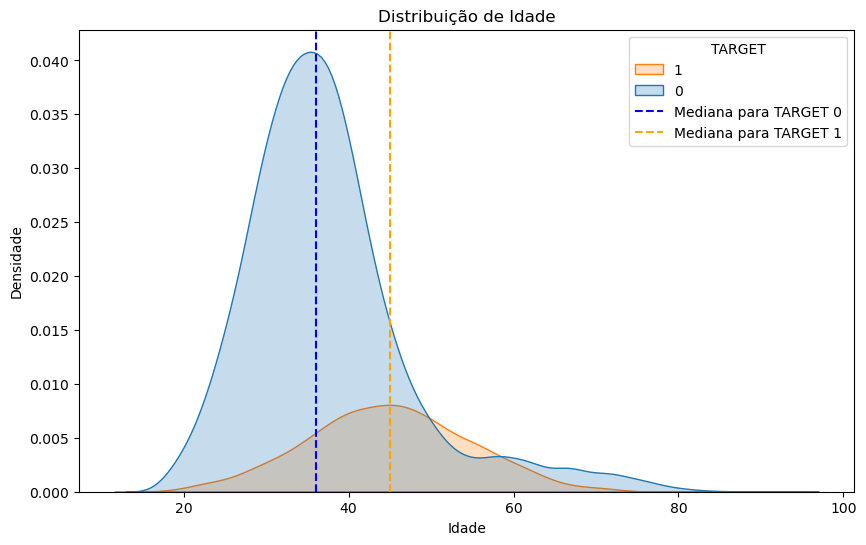

C:\Users\jeanr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


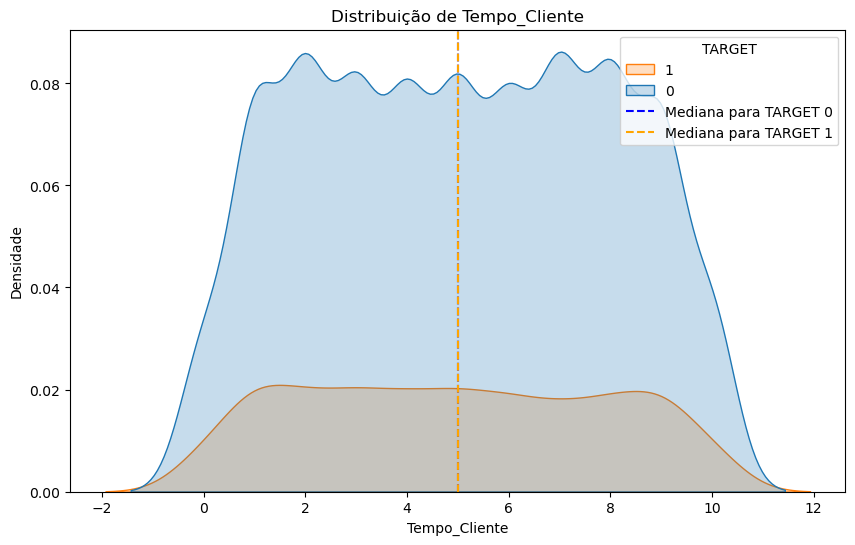

C:\Users\jeanr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


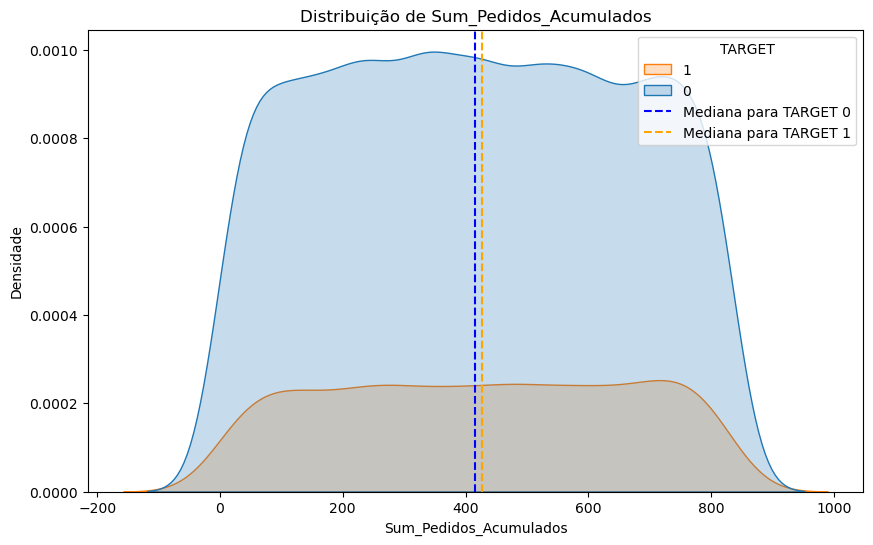

C:\Users\jeanr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


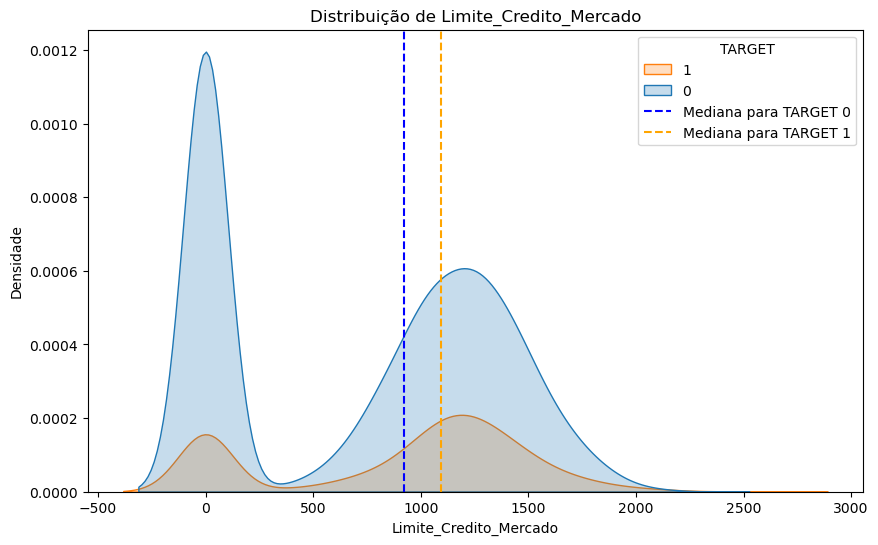

C:\Users\jeanr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


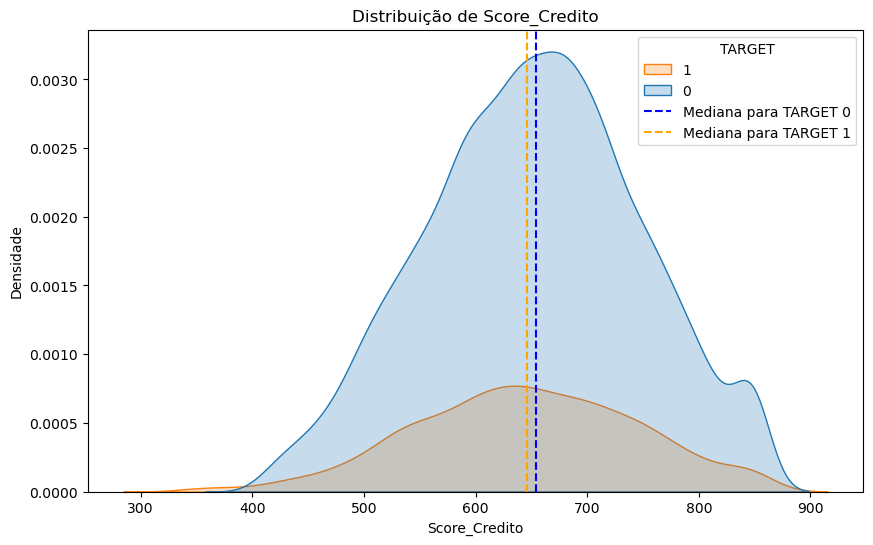

In [7]:
for var in vars_numericas:

  # Calcular as medianas para cada grupo
  medianas = df_churn.groupby('Target')[var].median()

  colors = ['blue','orange']
  i = 0

  plt.figure(figsize=(10, 6))
  sns.kdeplot(data=df_churn, x=var, hue='Target', fill=True, warn_singular=False)

  # Adicionar linhas verticais representando as medianas
  for target, mediana in medianas.items():
      plt.axvline(x=mediana, linestyle='--', color=colors[i], label=f'Mediana para TARGET {target}')
      i += 1

  plt.title(f'Distribuição de {var}')
  plt.ylabel('Densidade')
  plt.xlabel(f'{var}')
  plt.legend(title='TARGET', loc='upper right', labels=['1', '0', 'Mediana para TARGET 0', 'Mediana para TARGET 1'])
  plt.show()

## Obter a probabilidade de um cliente sair da empresa e com isso as variáveis que mais impactam o aumento da probabilidade de saída.

Regressão Logística

## Funções auxiliares

In [8]:
# Métricas do modelo

def calculate_metrics(nm_modelo, model, X_train, y_train, X_test, y_test):
    # Fazendo predições
    y_train_prob = (model.predict_proba(X_train))[:,1]
    y_test_prob = (model.predict_proba(X_test))[:,1]

    y_train_pred = (model.predict(X_train))
    y_test_pred = (model.predict(X_test))

    # Calculando as métricas para o conjunto de treino
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    auc_roc_train = roc_auc_score(y_train, np.array(y_train_prob))

    # Calculando o Índice Gini e Estatística KS para o conjunto de treino
    probabilities_train = np.array(y_train_prob)
    df_train = pd.DataFrame({'true_labels': y_train, 'predicted_probs': probabilities_train})
    df_train = df_train.sort_values(by='predicted_probs', ascending=False)
    df_train['cumulative_true'] = df_train['true_labels'].cumsum() / df_train['true_labels'].sum()
    df_train['cumulative_false'] = (1 - df_train['true_labels']).cumsum() / (1 - df_train['true_labels']).sum()
    ks_statistic_train = max(abs(df_train['cumulative_true'] - df_train['cumulative_false']))
    gini_index_train = 2 * auc_roc_train - 1

    # Calculando as métricas para o conjunto de teste
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    auc_roc_test = roc_auc_score(y_test, np.array(y_test_prob))

    # Calculando o Índice Gini e Estatística KS para o conjunto de teste
    probabilities_test = np.array(y_test_prob)
    df_test = pd.DataFrame({'true_labels': y_test, 'predicted_probs': probabilities_test})
    df_test = df_test.sort_values(by='predicted_probs', ascending=False)
    df_test['cumulative_true'] = df_test['true_labels'].cumsum() / df_test['true_labels'].sum()
    df_test['cumulative_false'] = (1 - df_test['true_labels']).cumsum() / (1 - df_test['true_labels']).sum()
    ks_statistic_test = max(abs(df_test['cumulative_true'] - df_test['cumulative_false']))
    gini_index_test = 2 * auc_roc_test - 1

    # Criando o DataFrame com as métricas calculadas
    metrics_df = pd.DataFrame({
        'Algoritmo': [nm_modelo, nm_modelo],
        'Conjunto': ['Treino', 'Teste'],
        'Acuracia': [accuracy_train, accuracy_test],
        'Precisao': [precision_train, precision_test],
        'Recall': [recall_train, recall_test],
        'AUC_ROC': [auc_roc_train, auc_roc_test],
        'GINI': [gini_index_train, gini_index_test],
        'KS': [ks_statistic_train, ks_statistic_test]
    })
    return metrics_df

# Metadados referente ao conjunto de dados
def generate_metadata(dataframe):
    """
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :param dataframe: DataFrame para o qual os metadados serão gerados.
    :return: DataFrame contendo metadados.
    """

    # Coleta de metadados básicos
    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata=metadata.sort_values(by='percent_nulos',ascending=False)
    metadata = metadata.reset_index(drop=True)

    return metadata

## Split dos Dados

In [9]:
abt = df_churn.drop(columns=['DataExtracao','Target','ClientId','DataUltimaTransacao', 'DiasDesdeUltTransacao', 'TARGET'])
target = df_churn.Target

X_train, X_test, y_train, y_test = train_test_split(abt,target,test_size=0.2,random_state=0)

## Preparação dos dados e seleção de variáveis

In [10]:
# Imputar dados
from sklearn.impute import SimpleImputer

abt_treino = pd.concat((X_train,y_train),axis=1)
abt_test = pd.concat((X_test,y_test),axis=1)

imputer_num = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy='most_frequent')

num_features_train = X_train[vars_numericas]
cat_features_train = X_train[vars_categoricas]

num_features_test = X_test[vars_numericas]
cat_features_test = X_test[vars_categoricas]

df1 = pd.DataFrame(imputer_num.fit_transform(num_features_train),columns=vars_numericas)
df2 = pd.DataFrame(imputer_num.transform(num_features_test),columns=vars_numericas)
df1.index = num_features_train.index
df2.index = num_features_test.index
num_features_train = df1.copy()
num_features_test = df2.copy()

df1 = pd.DataFrame(imputer_cat.fit_transform(cat_features_train),columns=vars_categoricas)
df2 = pd.DataFrame(imputer_cat.transform(cat_features_test),columns=vars_categoricas)
df1.index = cat_features_train.index
df2.index = cat_features_test.index
cat_features_train = df1.copy()
cat_features_test = df2.copy()

ce = TargetEncoder()

cat_features_train = ce.fit_transform(cat_features_train,y_train)
cat_features_test = ce.transform(cat_features_test,y_test)

new_abt_treino = pd.concat((num_features_train,cat_features_train),axis=1)
new_abt_teste = pd.concat((num_features_test,cat_features_test),axis=1)

# Remoção de variáveis com zero variância

selector = VarianceThreshold(threshold=0)
selector.fit_transform(new_abt_treino)

# Colunas selecionadas
selected_features = new_abt_treino.columns[selector.get_support()]

# Manter apenas features selecionadas
new_abt_treino = new_abt_treino[selected_features]
new_abt_teste = new_abt_teste[selected_features]

# Remoção de variáveis altamente correlacionadas

threshold = 0.8

# Calcule a matriz de correlação
corr_matrix = new_abt_treino.corr().abs()

# Selecione o triângulo superior da matriz de correlação
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identifique as colunas a serem eliminadas com base no limite
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

# Drop the columns
new_abt_treino = new_abt_treino.drop(columns=to_drop)
new_abt_teste = new_abt_teste.drop(columns=to_drop)

# new_abt_treino = pd.concat((new_abt_treino,y_train),axis=1)
# new_abt_teste = pd.concat((new_abt_teste,y_test),axis=1)

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
import xgboost as xgb
import matplotlib.pyplot as plt

xgb_model = xgb.XGBClassifier(random_state=0)

xgb_model.fit(new_abt_treino, y_train)

# Obter a importância das features
feature_importance = xgb_model.feature_importances_

df = pd.DataFrame({'Feature':new_abt_treino.columns,'Importance':feature_importance})

features_rl = df.sort_values(by='Importance',ascending=False)[:20].Feature.to_list()

X_train_03 = new_abt_treino[features_rl]
X_test_03 = new_abt_teste[features_rl]

new_abt_treino = pd.concat((X_train_03,y_train),axis=1)
new_abt_teste = pd.concat((X_test_03,y_test),axis=1)

## Verificar a linearidade com a log da odds

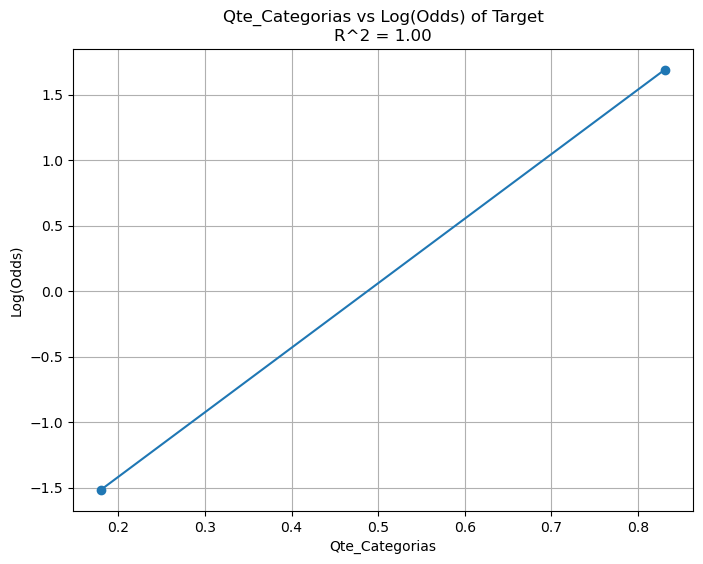

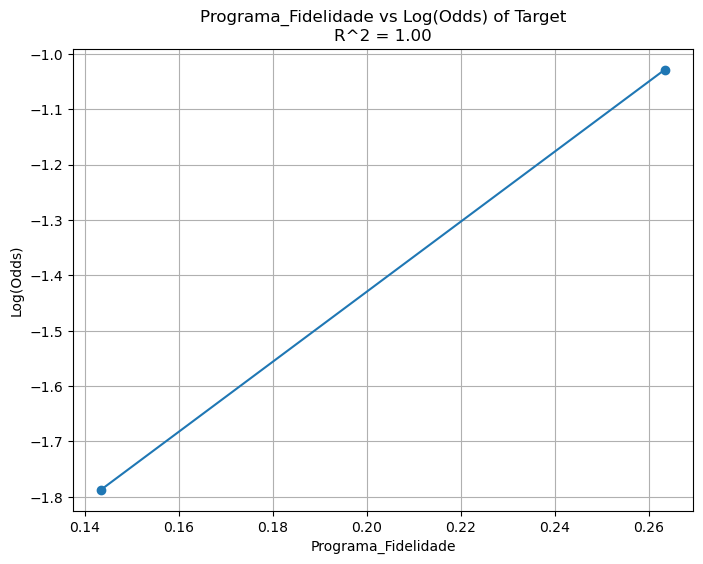

C:\Users\jeanr\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


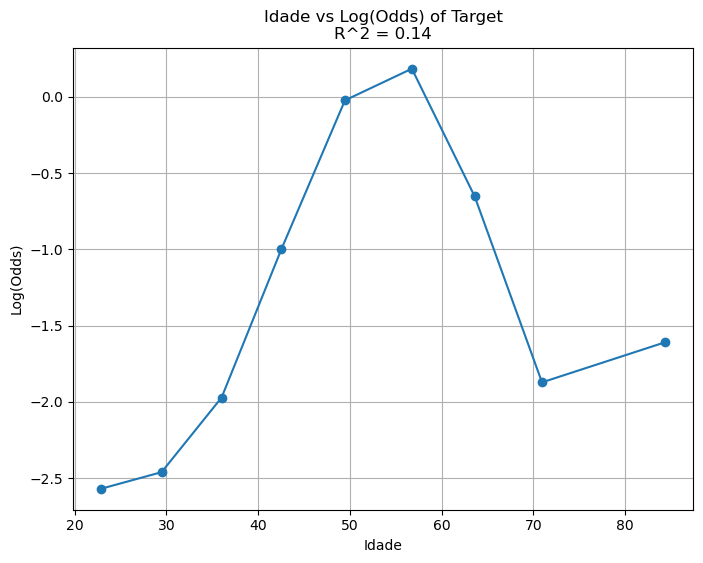

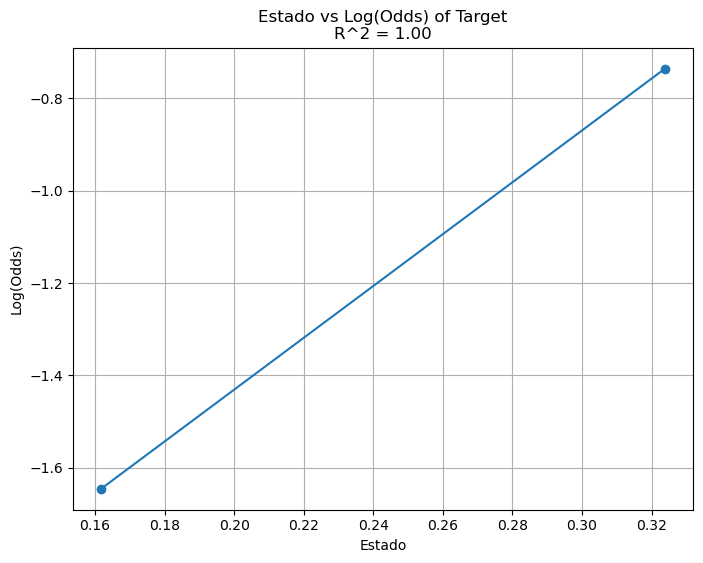

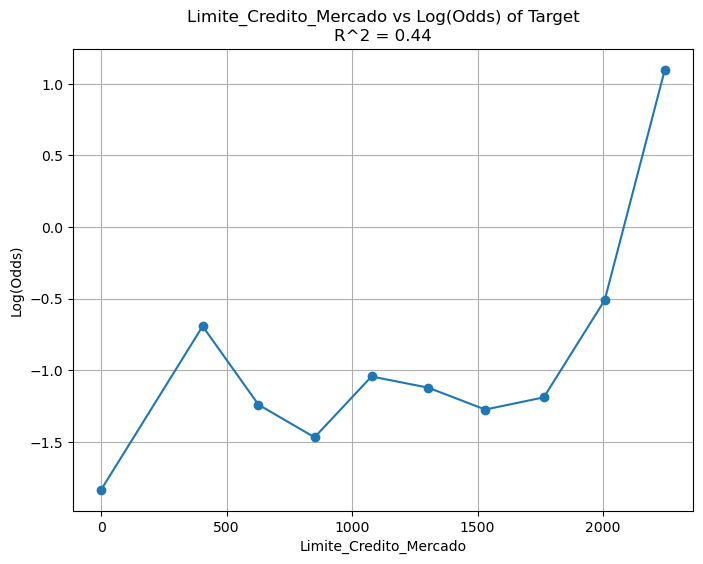

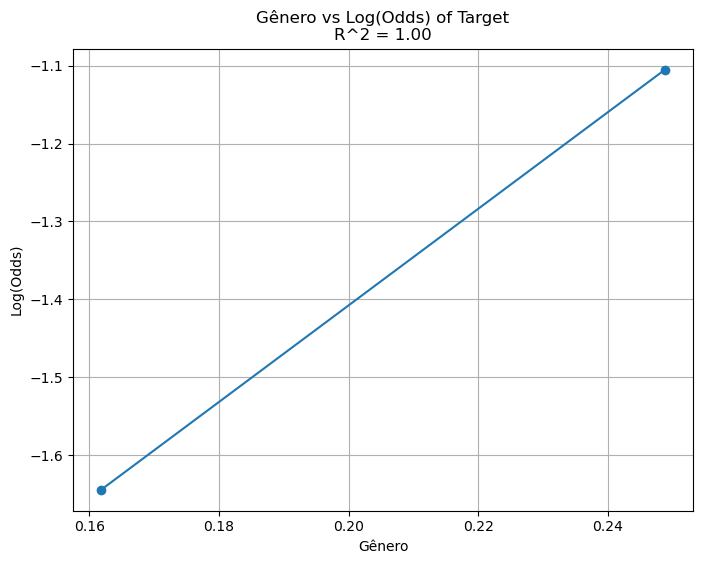

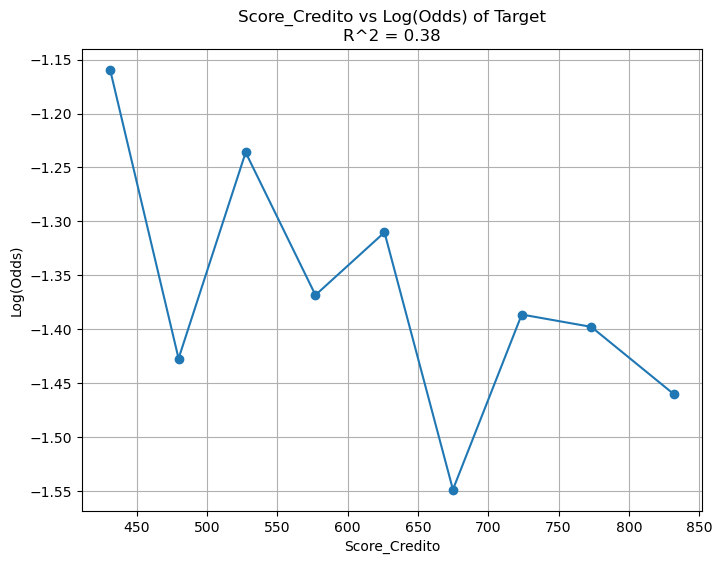

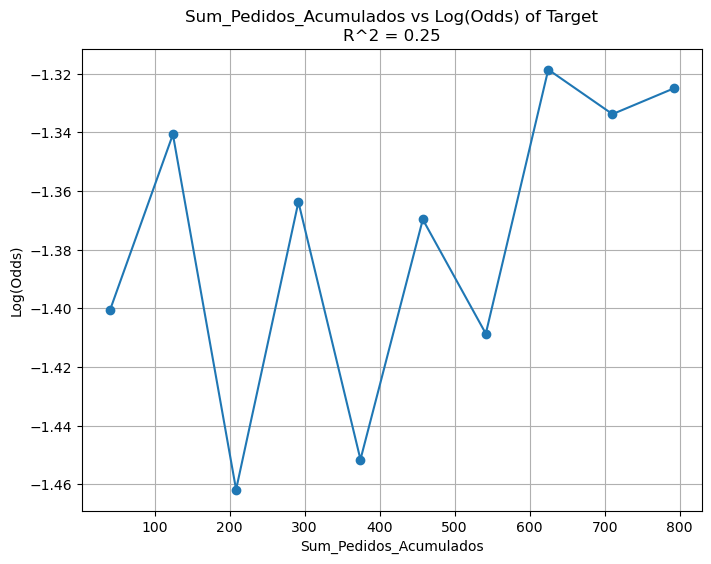

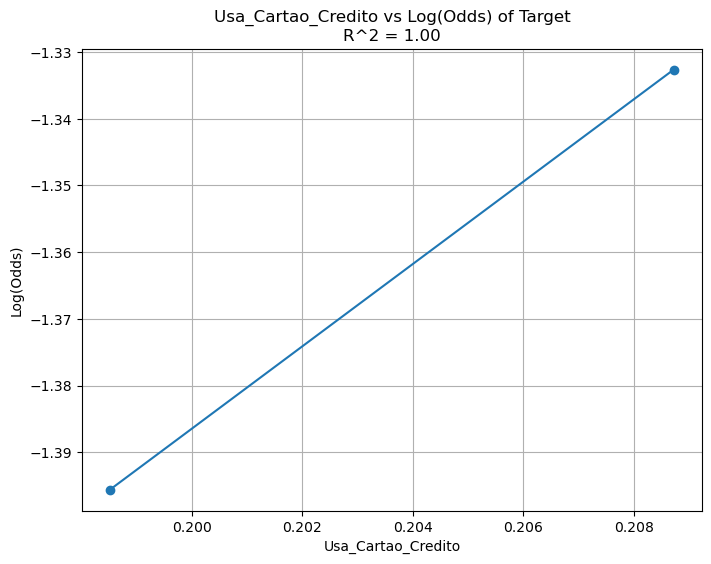

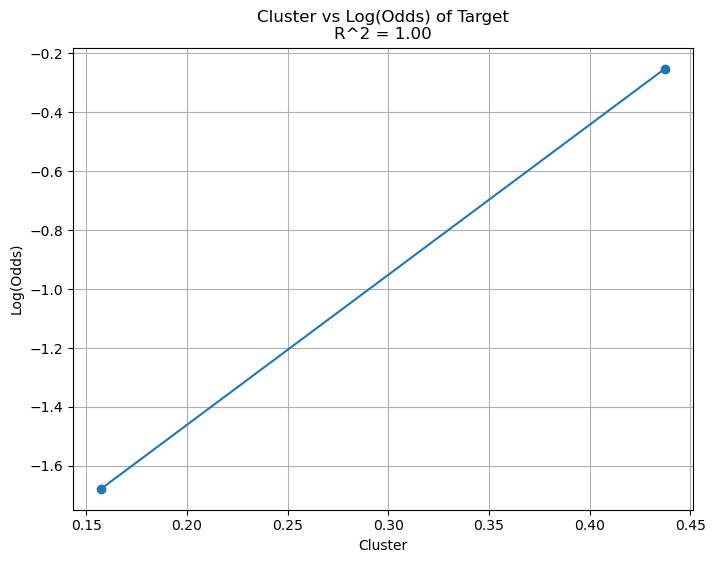

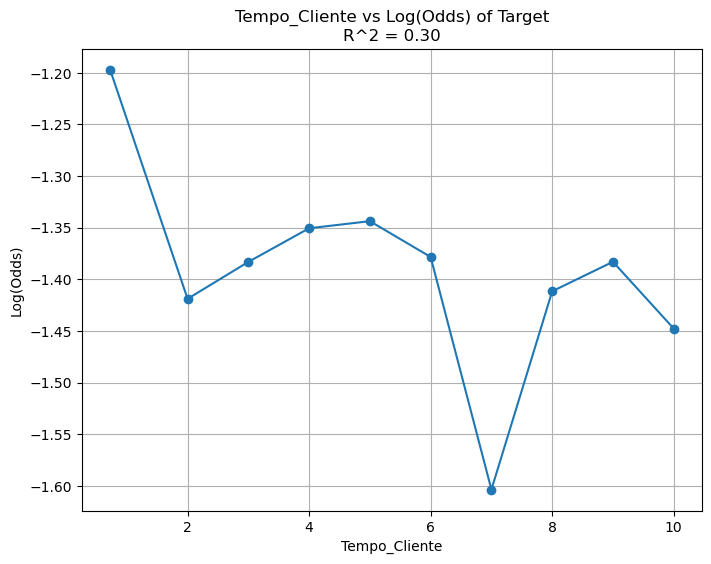

In [11]:
from sklearn.linear_model import LinearRegression

def plot_variable_vs_logodds(df, variables, target):
    for variable in variables:
        # Verificando o número de valores únicos
        unique_vals = df[variable].nunique()
        if unique_vals == 1:
            print(f"{variable} tem apenas um valor único. Ignorando...")
            continue

        n_bins = min(10, unique_vals)

        # Criando bins para a variável
        df['bin'] = pd.cut(df[variable], bins=n_bins, labels=False, duplicates='drop')

        # Calculando a proporção de eventos positivos para cada bin
        mean_target = df.groupby('bin')[target].mean()

        # Calculando o log(odds) e tratando valores infinitos
        log_odds = np.log(mean_target / (1 - mean_target)).replace([np.inf, -np.inf], np.nan).dropna()

        # Calculando R^2
        X = df.groupby('bin')[variable].mean()[log_odds.index].values.reshape(-1, 1)
        y = log_odds.values
        model = LinearRegression().fit(X, y)
        r2 = model.score(X, y)

        # Plotando
        plt.figure(figsize=(8, 6))
        plt.plot(X, y, marker='o')
        plt.xlabel(variable)
        plt.ylabel('Log(Odds)')
        plt.title(f'{variable} vs Log(Odds) of {target}\nR^2 = {r2:.2f}')
        plt.grid(True)
        plt.show()

        # Removendo a coluna bin
        df.drop('bin', axis=1, inplace=True)

plot_variable_vs_logodds(new_abt_treino, list(new_abt_treino.drop(columns='Target').columns),'Target')

In [12]:
def calculate_r2_for_logodds(df, variables, target, threshold):
    results = []

    for variable in variables:
        # Verificando o número de valores únicos
        unique_vals = df[variable].nunique()
        if unique_vals == 1:
            print(f"{variable} tem apenas um valor único. Ignorando...")
            continue

        n_bins = min(10, unique_vals)

        # Criando bins para a variável
        df['bin'] = pd.cut(df[variable], bins=n_bins, labels=False, duplicates='drop')

        # Calculando a proporção de eventos positivos para cada bin
        mean_target = df.groupby('bin')[target].mean()

        # Calculando o log(odds) e tratando valores infinitos
        log_odds = np.log(mean_target / (1 - mean_target)).replace([np.inf, -np.inf], np.nan).dropna()

        # Calculando R^2
        X = df.groupby('bin')[variable].mean()[log_odds.index].values.reshape(-1, 1)
        y = log_odds.values
        model = LinearRegression().fit(X, y)
        r2 = model.score(X, y)

        # Decidindo sobre a engenharia de recursos com base no valor de R^2 e no threshold fornecido
        feat_eng = "Usar como contínua" if r2 > threshold else "Categorizar"

        results.append({
            'Variable': variable,
            'R^2': r2,
            'Feat Eng': feat_eng
        })

        # Removendo a coluna bin
        df.drop('bin', axis=1, inplace=True)

    return pd.DataFrame(results)

r2_df = calculate_r2_for_logodds(new_abt_treino, list(new_abt_treino.drop(columns='Target').columns), 'Target',threshold=0.85)
r2_df.loc[r2_df['Variable'].isin(vars_categoricas), 'Feat Eng'] = 'Categorizar'
r2_df

C:\Users\jeanr\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Variable,R^2,Feat Eng
0,Qte_Categorias,1.000000,Categorizar
1,Programa_Fidelidade,1.000000,Categorizar
2,Idade,0.140516,Categorizar
3,Estado,1.000000,Categorizar
4,Limite_Credito_Mercado,0.437729,Categorizar
5,Gênero,1.000000,Categorizar
6,Score_Credito,0.384270,Categorizar
7,Sum_Pedidos_Acumulados,0.246089,Categorizar
8,Usa_Cartao_Credito,1.000000,Categorizar
9,Cluster,1.000000,Categorizar


In [13]:
variaveis_continuas = r2_df[r2_df['Feat Eng'] == 'Usar como contínua']['Variable'].tolist()
categorize_vars = r2_df[r2_df['Feat Eng'] == 'Categorizar']['Variable'].tolist()

## Transformação matemática

### Avaliar se aplicar uma transformação matemática gera linearidade das demais variáveis com a log da odds

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def calculate_r2_for_logodds_and_transformations(df, variables, target, threshold):
    results = []

    transformations = {
        'AbsLog': lambda x: np.log(np.abs(x) + 1),  # Adicionamos 1 para evitar log(0)
        'Quadratic': lambda x: x**2
    }

    for variable in variables:
        best_transform_r2 = -np.inf
        best_transform_name = 'None'
        best_transform_function = None

        for transform_name, transform_function in transformations.items():
            transformed_var = transform_function(df[variable])

            # Verificando o número de valores únicos
            unique_vals = transformed_var.nunique()
            if unique_vals == 1:
                continue

            n_bins = min(10, unique_vals)

            # Criando bins para a variável transformada
            df['bin'] = pd.cut(transformed_var, bins=n_bins, labels=False, duplicates='drop')

            # Calculando a proporção de eventos positivos para cada bin
            mean_target = df.groupby('bin')[target].mean()

            # Calculando o log(odds) e tratando valores infinitos
            log_odds = np.log(mean_target / (1 - mean_target)).replace([np.inf, -np.inf], np.nan).dropna()

            # Calculando R^2
            X = df.groupby('bin')[transformed_var.name].mean()[log_odds.index].values.reshape(-1, 1)
            y = log_odds.values
            model = LinearRegression().fit(X, y)
            r2 = model.score(X, y)

            # Se essa transformação for a melhor até agora, atualize as melhores variáveis
            if r2 > best_transform_r2:
                best_transform_r2 = r2
                best_transform_name = transform_name
                best_transform_function = transform_function

            # Removendo a coluna bin
            df.drop('bin', axis=1, inplace=True)

        feat_eng = "Usar como contínua" if best_transform_r2 > threshold else "Categorizar"

        results.append({
            'Variable': variable,
            'Best Transformation': best_transform_name,
            'R^2 of Transformation': best_transform_r2,
            'Feat Eng': feat_eng,
            'Transformation Equation': f'{best_transform_name}({variable})'
        })

    return pd.DataFrame(results)

results_df = calculate_r2_for_logodds_and_transformations(new_abt_treino, categorize_vars, 'Target',threshold=0.85)
results_df.loc[results_df['Variable'].isin(vars_categoricas), 'Feat Eng'] = 'Categorizar'
results_df

C:\Users\jeanr\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\jeanr\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Variable,Best Transformation,R^2 of Transformation,Feat Eng,Transformation Equation
0,Qte_Categorias,Quadratic,1.000000,Categorizar,Quadratic(Qte_Categorias)
1,Programa_Fidelidade,AbsLog,1.000000,Categorizar,AbsLog(Programa_Fidelidade)
2,Idade,Quadratic,0.059333,Categorizar,Quadratic(Idade)
3,Estado,AbsLog,1.000000,Categorizar,AbsLog(Estado)
4,Limite_Credito_Mercado,Quadratic,0.503758,Categorizar,Quadratic(Limite_Credito_Mercado)
5,Gênero,AbsLog,1.000000,Categorizar,AbsLog(Gênero)
6,Score_Credito,AbsLog,0.465408,Categorizar,AbsLog(Score_Credito)
7,Sum_Pedidos_Acumulados,Quadratic,0.336815,Categorizar,Quadratic(Sum_Pedidos_Acumulados)
8,Usa_Cartao_Credito,AbsLog,1.000000,Categorizar,AbsLog(Usa_Cartao_Credito)
9,Cluster,AbsLog,1.000000,Categorizar,AbsLog(Cluster)


In [15]:
def apply_best_transformations(results_df, original_df, drop_original=False):
    transformed_df = original_df.copy()

    transformations = {
        'LogAbs': lambda x: np.log(np.abs(x) + 1),
        'Quadratic': lambda x: x**2
    }

    variables_transformed = []

    for index, row in results_df.iterrows():
        variable = row['Variable']
        best_transform_name = row['Best Transformation']
        feat_eng = row['Feat Eng']

        if feat_eng == 'Usar como contínua' and best_transform_name in transformations:
            transform_function = transformations[best_transform_name]
            transformed_var = transform_function(original_df[variable])
            transformed_df[f'TFE_{variable}'] = transformed_var
            variables_transformed.append(variable)

    # Descarta as variáveis originais se drop_original for True
    if drop_original:
        transformed_df.drop(variables_transformed, axis=1, inplace=True)

    return transformed_df

new_abt_treino_transform = apply_best_transformations(results_df, new_abt_treino,drop_original=True)
new_abt_teste_transform = apply_best_transformations(results_df, new_abt_teste,drop_original=True)

In [16]:
var = list(results_df[results_df['Feat Eng'] == 'Usar como contínua'].Variable)
var = ["TFE_" + variavel for variavel in var]
variaveis_continuas += var

## Categorização

### Categorizar as variáveis que estão não apresentaram comportamento linear com a log da odds

In [17]:
# Cálculo do R² considerando o dataset atualizado
r2_df = calculate_r2_for_logodds(new_abt_treino_transform, new_abt_treino_transform.drop(columns=['Target']), 'Target',threshold=0.85)
r2_df.loc[r2_df['Variable'].isin(vars_categoricas), 'Feat Eng'] = 'Categorizar'

# Separar variáveis que ainda não se tornaram linear com o log da odds mesmo após as transformações
variaveis_categorizar = r2_df[r2_df['Feat Eng'] == 'Categorizar'].Variable.to_list()

# Verificar cardinalidade dessas variáveis
df = generate_metadata(new_abt_treino_transform[variaveis_categorizar])

C:\Users\jeanr\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


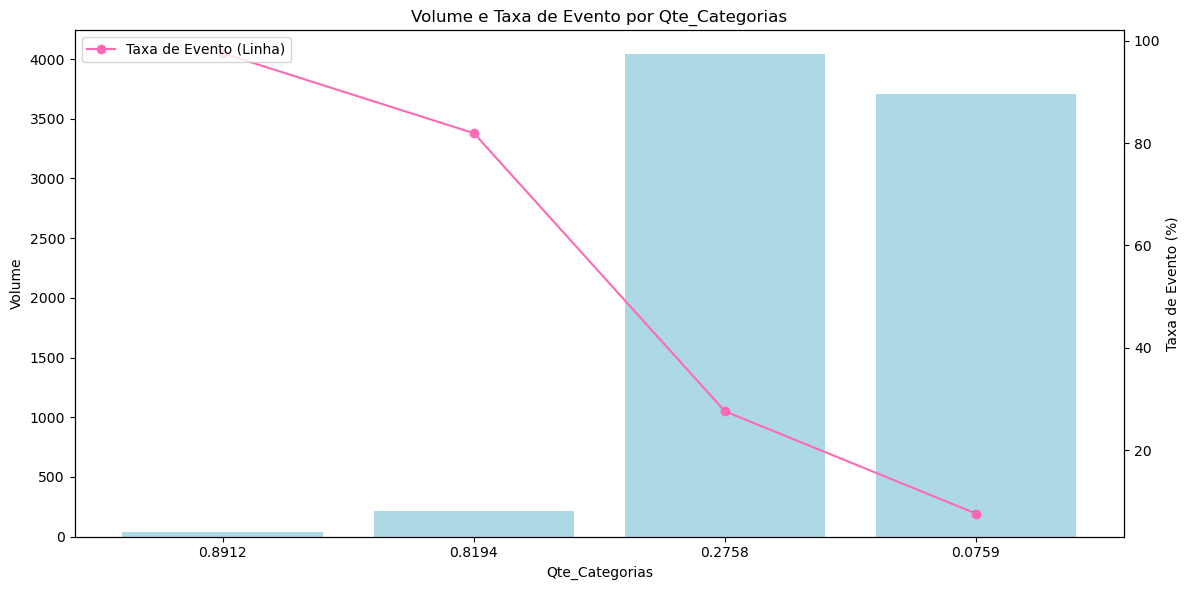

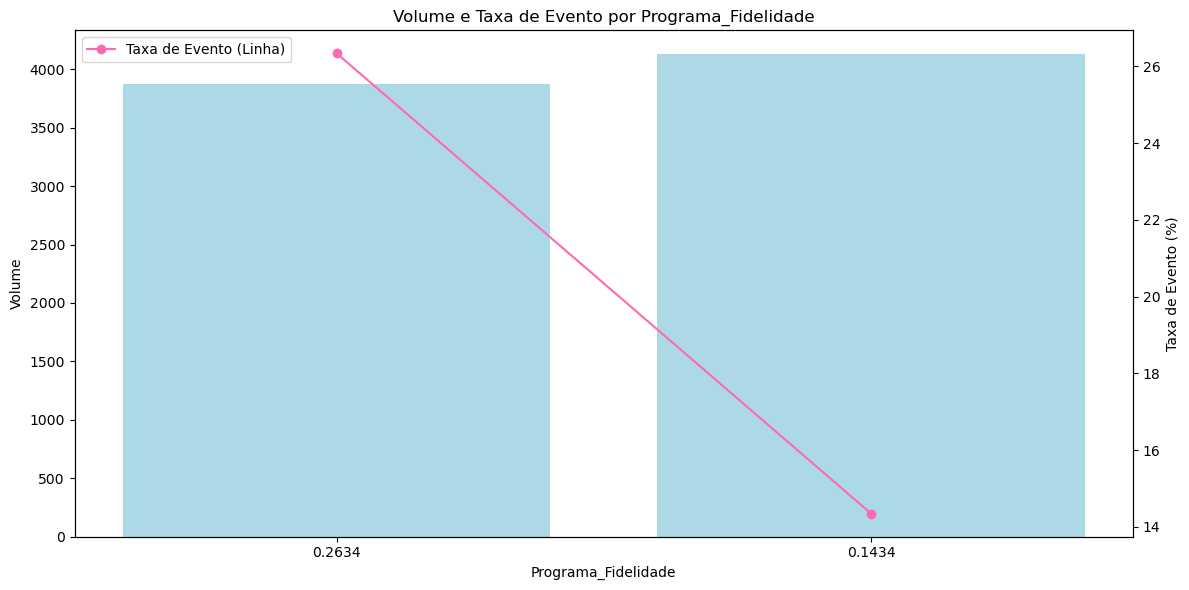

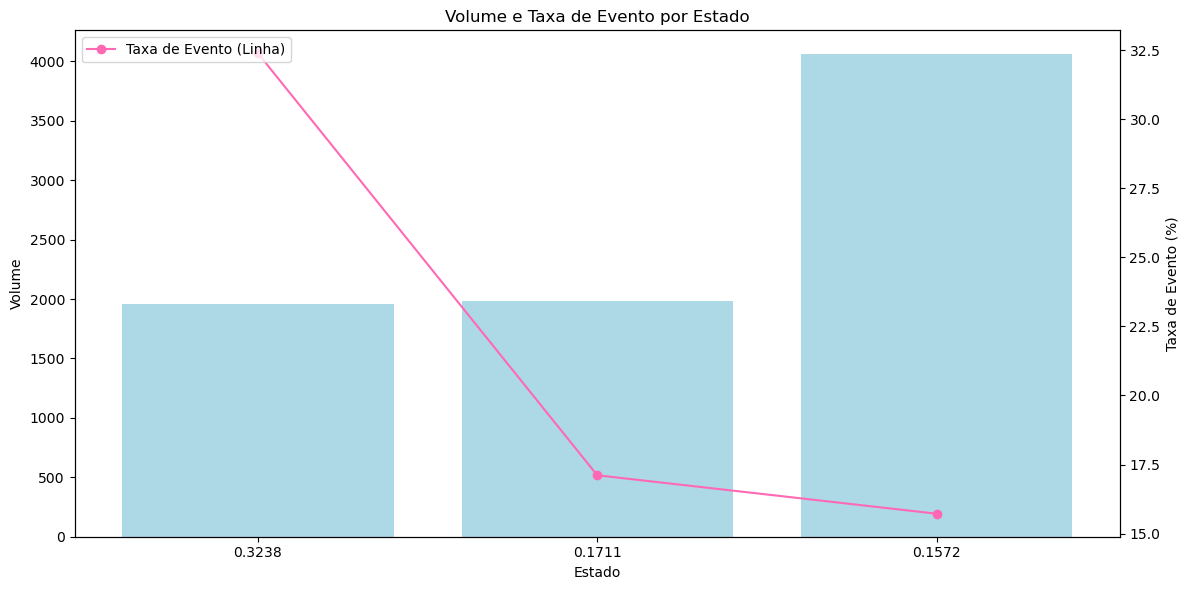

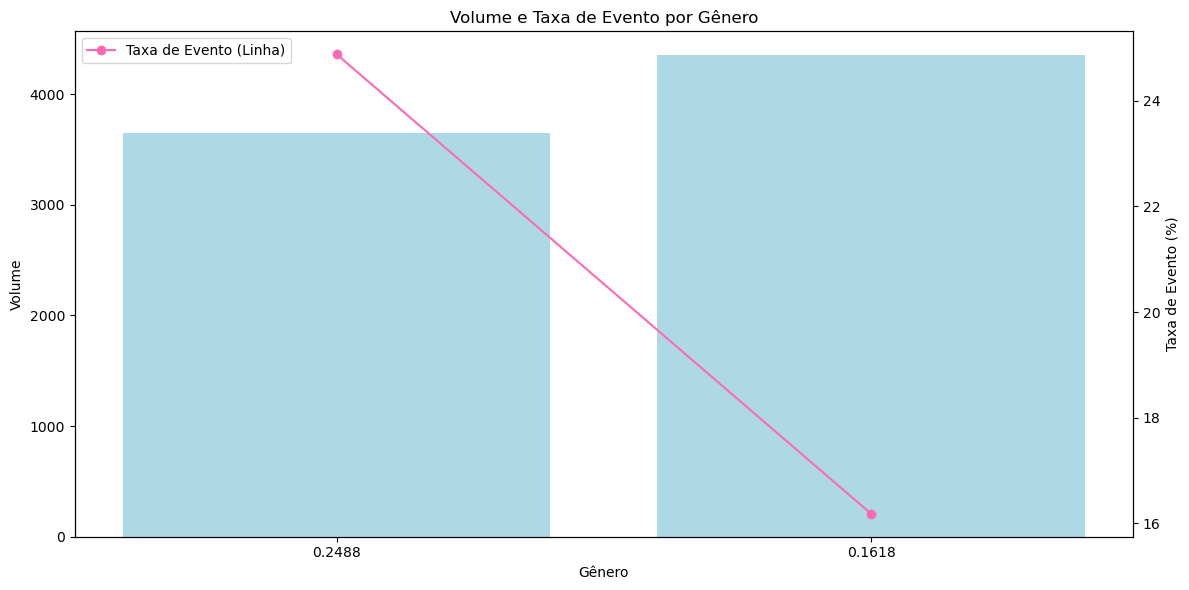

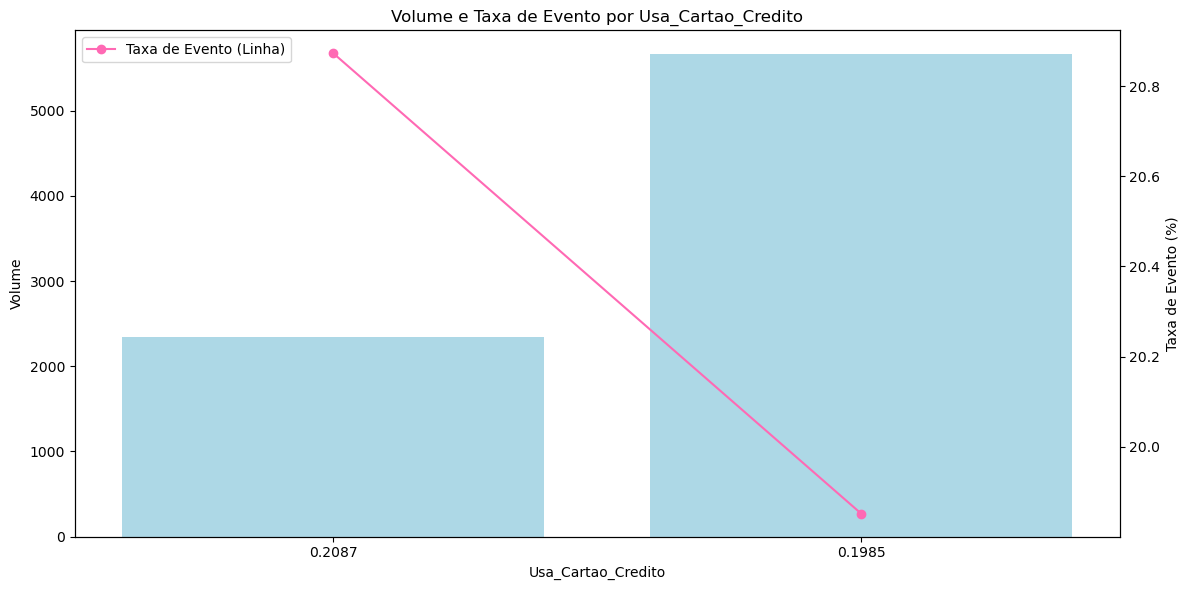

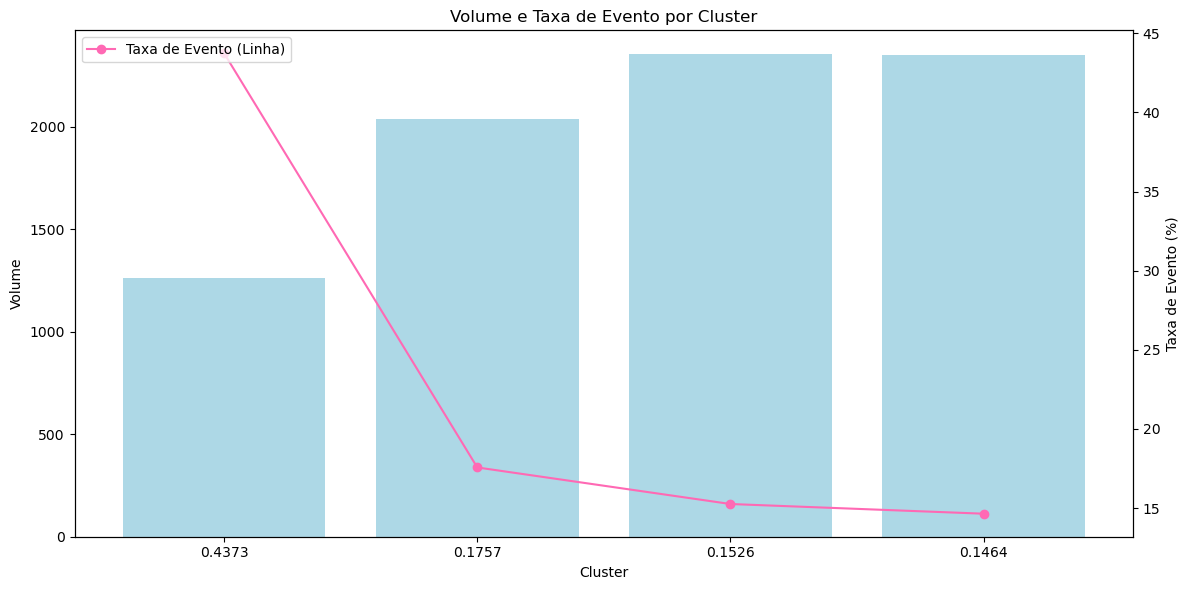

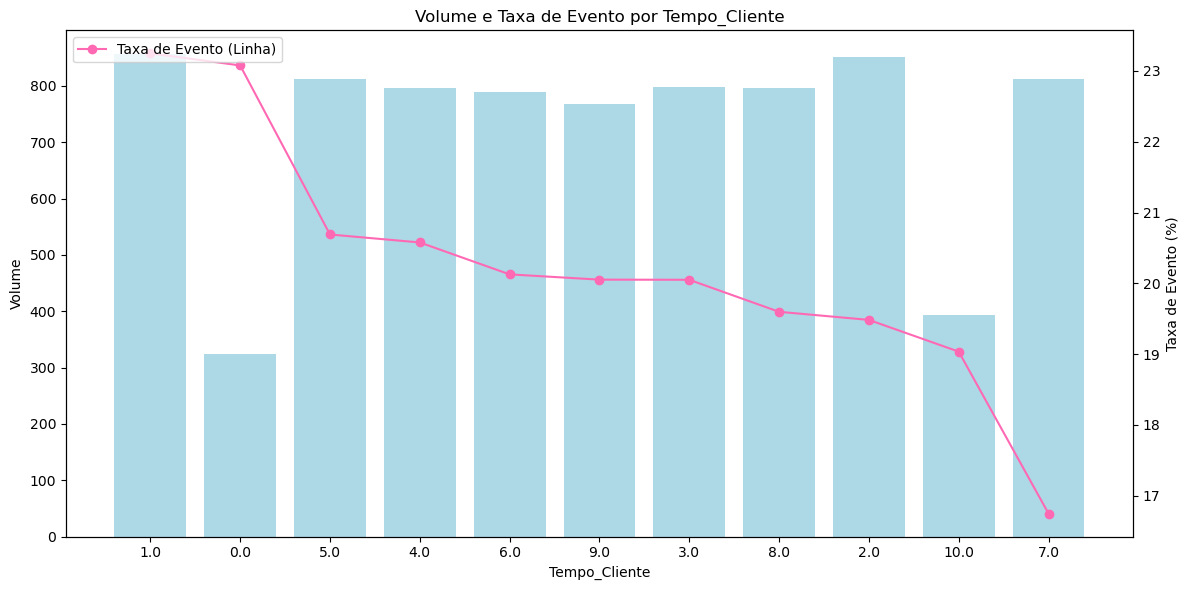

In [18]:
# Analizar essas variáveis (variaveis_categorizar) que contém baixa cardinalidade (menor ou igual a 20) e verificar se há ordenação entre as categorias
ordinais = df[df.cardinalidade <= 20].nome_variavel.to_list()

def analyze_variable(dataframe, variable, target):

    # Se a variável for numérica, arredonda para 4 casas decimais
    if pd.api.types.is_numeric_dtype(dataframe[variable]):
        dataframe[variable] = dataframe[variable].round(4)
        dataframe[variable] = dataframe[variable].astype(str)

    # Calcula a taxa de evento e o volume para cada categoria da variável
    result = dataframe.groupby(variable).agg({target: 'mean', variable: 'count'}).rename(columns={variable: 'Volume'}).reset_index()
    result.columns = [variable, 'Taxa_de_Evento', 'Volume']

    # Ordena o resultado pela Taxa de Evento em ordem decrescente
    result = result.sort_values(by='Taxa_de_Evento', ascending=False)

    # Plota o gráfico
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Eixo Y esquerdo: Volume
    bars = ax1.bar(result[variable], result['Volume'], color='lightblue', label='Volume (Barras)')
    ax1.set_xlabel(variable)
    ax1.set_ylabel('Volume', color='black')
    ax1.tick_params(axis='y', labelcolor='black')

    # Eixo Y direito: Taxa de Evento
    ax2 = ax1.twinx()
    lines = ax2.plot(result[variable], result['Taxa_de_Evento'] * 100, marker='o', linestyle='-', color='hotpink', label='Taxa de Evento (Linha)')
    ax2.set_ylabel('Taxa de Evento (%)', color='black')
    ax2.tick_params(axis='y', labelcolor='black')

    # Combina as legendas de ambos os eixos, filtrando rótulos que começam com '_'
    plots = [item for item in bars + tuple(lines) if not item.get_label().startswith('_')]
    labels = [plot.get_label() for plot in plots]
    plt.legend(plots, labels, loc='upper left')

    plt.title(f'Volume e Taxa de Evento por {variable}')
    plt.xticks(rotation=45)  # Adicionado para melhor visualização dos labels no eixo X
    plt.tight_layout()
    plt.show()

    return result

for var in ordinais:
    result = analyze_variable(new_abt_treino_transform, var, "Target")

In [19]:
def categorize_with_decision_tree(dataframe, n_categories, target, numeric_var):
    import numpy as np
    import pandas as pd
    from sklearn.tree import DecisionTreeClassifier

    # Preparar os dados
    X = dataframe[[numeric_var]]
    y = dataframe[target]

    # Verificar se n_categories é 1 para tratar o caso especial
    if n_categories == 1:
        return pd.DataFrame({
            'Leaf': [1],
            'Taxa_de_Evento': [y.mean()],
            'Volume': [len(y)],
            'Lower_Bound': [-np.inf],
            'Upper_Bound': [np.inf]
        })

    # Treinar uma árvore de decisão com profundidade máxima igual ao número de categorias desejadas
    tree = DecisionTreeClassifier(max_leaf_nodes=n_categories)
    tree.fit(X, y)

    # Predizer a categoria (folha) para cada entrada no DataFrame
    leaf_ids = tree.apply(X)

    # Criar um DataFrame temporário com as categorias (folhas), a variável numérica e o target
    temp_df = pd.DataFrame({numeric_var: dataframe[numeric_var], 'Leaf': leaf_ids, target: y})

    result = temp_df.groupby('Leaf').agg({target: 'mean', numeric_var: ['count', 'min', 'max']}).reset_index()
    result.columns = ['Leaf', 'Taxa_de_Evento', 'Volume', 'Lower_Bound', 'Upper_Bound']

    # Ajuste para garantir que os limites superior e inferior de bins adjacentes não se sobreponham
    result = result.sort_values(by='Lower_Bound')
    for i in range(1, len(result)):
        result.iloc[i, 3] = max(result.iloc[i, 3], result.iloc[i-1, 4])

    # Definir o limite inferior do primeiro bin como -inf e o limite superior do último bin como inf
    result.iloc[0, 3] = -np.inf
    result.iloc[-1, 4] = np.inf

    return result

def apply_tree_bins(data, transformation_df, numeric_var):
    import numpy as np
    import pandas as pd

    df_copy = data.copy()

    # Verificar se há apenas uma categoria
    if len(transformation_df) == 1:
        # Atribuir a mesma categoria para todas as observações
        df_copy[f"TFT_{numeric_var}"] = 1
    else:
        transformation_df.Upper_Bound = transformation_df.Upper_Bound.astype('float')
        transformation_df.Lower_Bound = transformation_df.Lower_Bound.astype('float')

        # Obter os limites superiores e ordene-os
        upper_bounds = transformation_df['Upper_Bound'].sort_values().values

        # Use numpy.digitize para determinar a qual bin cada valor pertence
        df_copy[f"TFT_{numeric_var}"] = np.digitize(df_copy[numeric_var].astype(float), upper_bounds)

    df_copy.drop(axis=1, columns=[numeric_var], inplace=True)

    return df_copy

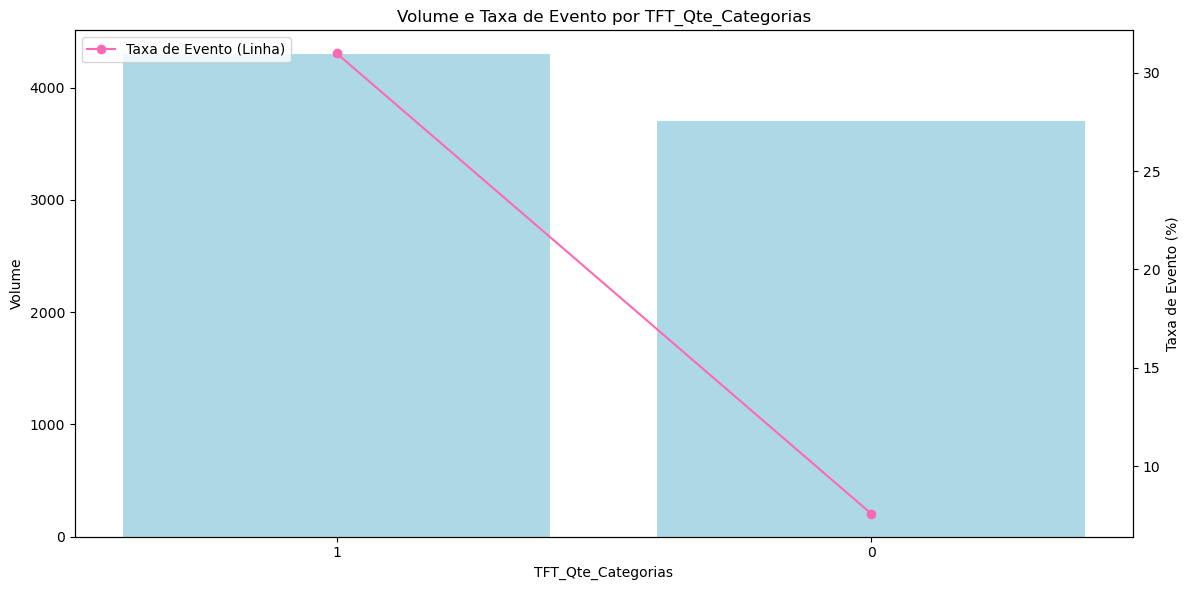

In [20]:
# Avaliar a quantidade de categorias
var = variaveis_categorizar[0]
nome_tft = 'TFT_' + var
result = categorize_with_decision_tree(new_abt_treino_transform, n_categories=2, target='Target', numeric_var=var)
df1_aux = apply_tree_bins(new_abt_treino_transform, result, numeric_var=var)

results = analyze_variable(df1_aux, nome_tft, "Target")

# Aplicar a quantidade de categorias escolhida
df1_treino = apply_tree_bins(new_abt_treino_transform, result, numeric_var=var)
df1_teste = apply_tree_bins(new_abt_teste_transform, result, numeric_var=var)

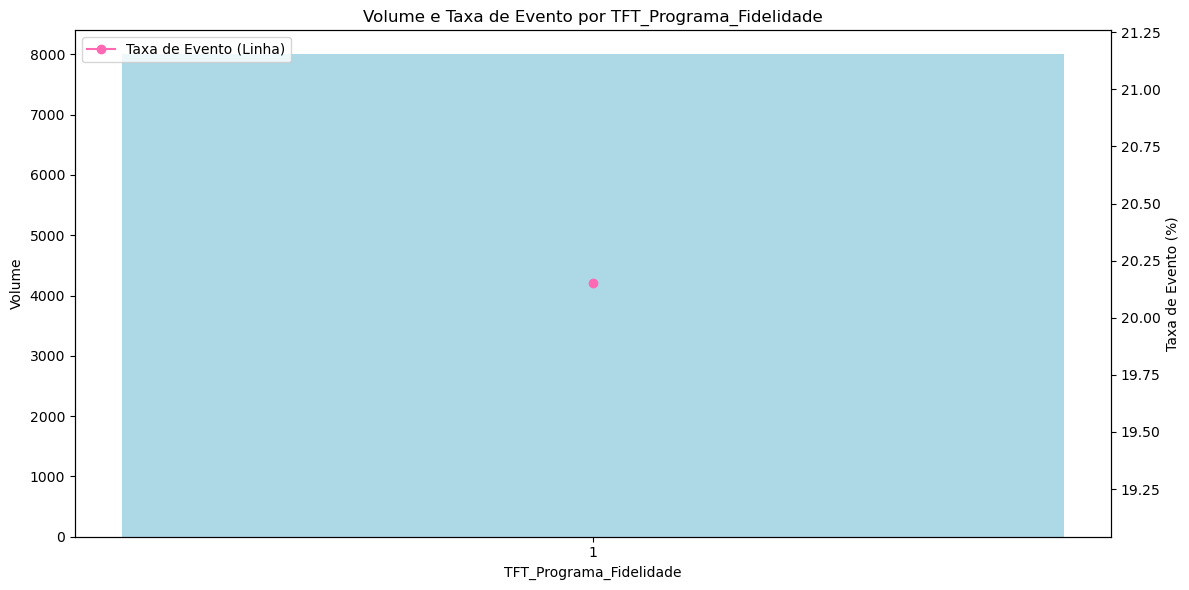

In [21]:
# Avaliar a quantidade de categorias
var = variaveis_categorizar[1]
nome_tft = 'TFT_' + var
result = categorize_with_decision_tree(df1_treino, n_categories=2, target='Target', numeric_var=var)
df1_aux = apply_tree_bins(df1_treino, result, numeric_var=var)

results = analyze_variable(df1_aux, nome_tft, "Target")

# Aplicar a quantidade de categorias escolhida
df1_treino = apply_tree_bins(df1_treino, result, numeric_var=var)
df1_teste = apply_tree_bins(df1_teste, result, numeric_var=var)

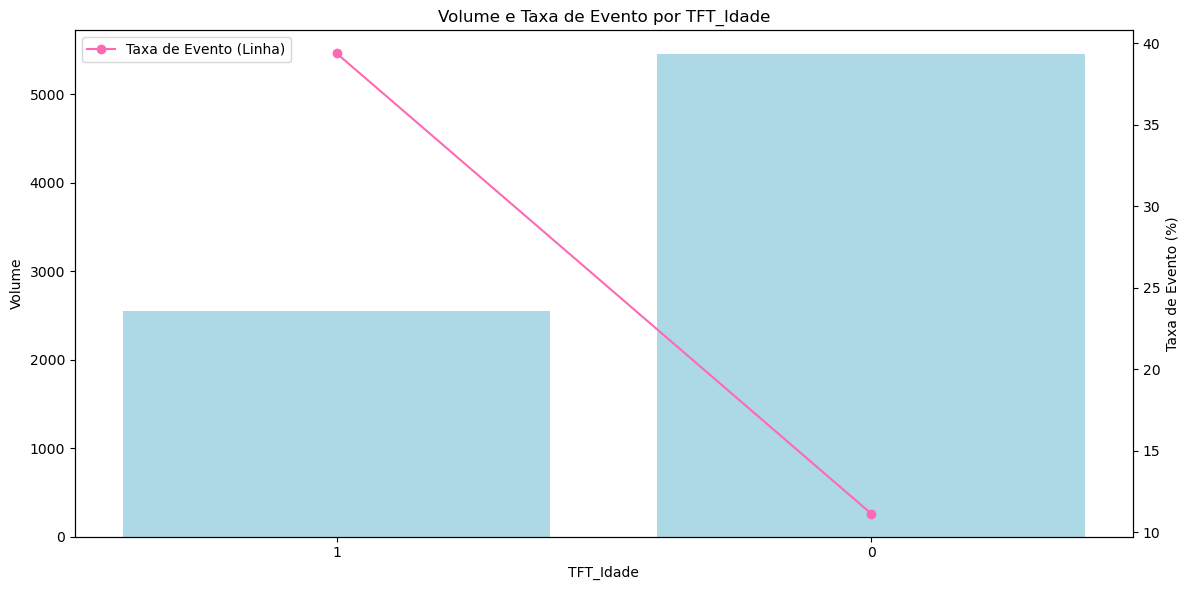

In [22]:
# Avaliar a quantidade de categorias
var = variaveis_categorizar[2]
nome_tft = 'TFT_' + var
result = categorize_with_decision_tree(df1_treino, n_categories=2, target='Target', numeric_var=var)
df1_aux = apply_tree_bins(df1_treino, result, numeric_var=var)

results = analyze_variable(df1_aux, nome_tft, "Target")

# Aplicar a quantidade de categorias escolhida
df1_treino = apply_tree_bins(df1_treino, result, numeric_var=var)
df1_teste = apply_tree_bins(df1_teste, result, numeric_var=var)

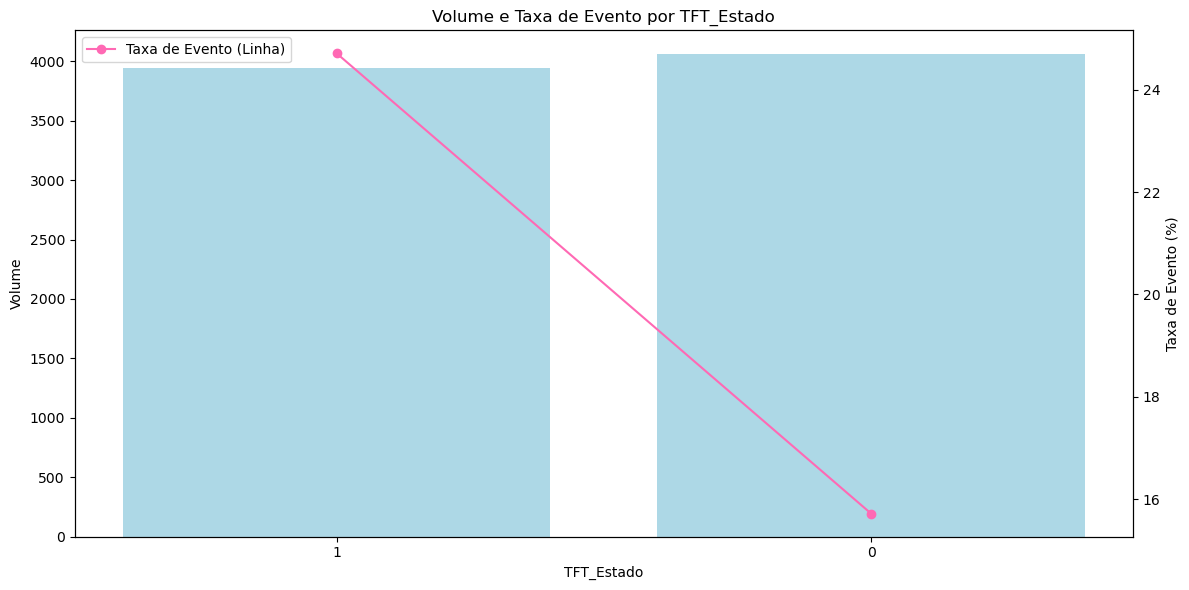

In [23]:
# Avaliar a quantidade de categorias
var = variaveis_categorizar[3]
nome_tft = 'TFT_' + var
result = categorize_with_decision_tree(df1_treino, n_categories=2, target='Target', numeric_var=var)
df1_aux = apply_tree_bins(df1_treino, result, numeric_var=var)

results = analyze_variable(df1_aux, nome_tft, "Target")

# Aplicar a quantidade de categorias escolhida
df1_treino = apply_tree_bins(df1_treino, result, numeric_var=var)
df1_teste = apply_tree_bins(df1_teste, result, numeric_var=var)

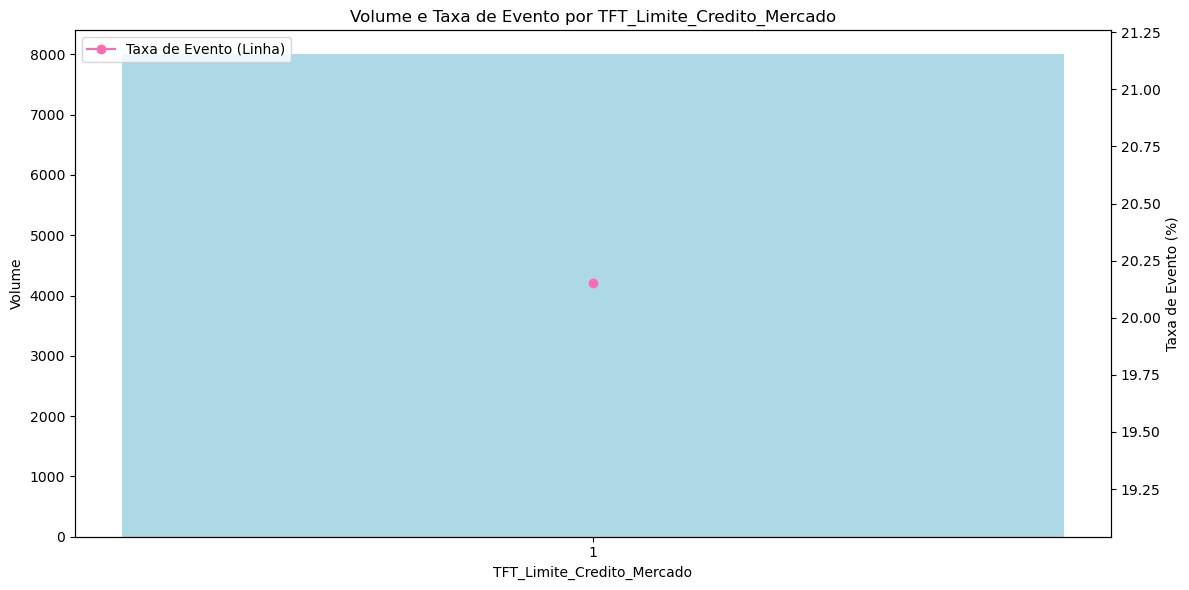

In [24]:
# Avaliar a quantidade de categorias
var = variaveis_categorizar[4]
nome_tft = 'TFT_' + var
result = categorize_with_decision_tree(df1_treino, n_categories=2, target='Target', numeric_var=var)
df1_aux = apply_tree_bins(df1_treino, result, numeric_var=var)

results = analyze_variable(df1_aux, nome_tft, "Target")

# Aplicar a quantidade de categorias escolhida
df1_treino = apply_tree_bins(df1_treino, result, numeric_var=var)
df1_teste = apply_tree_bins(df1_teste, result, numeric_var=var)

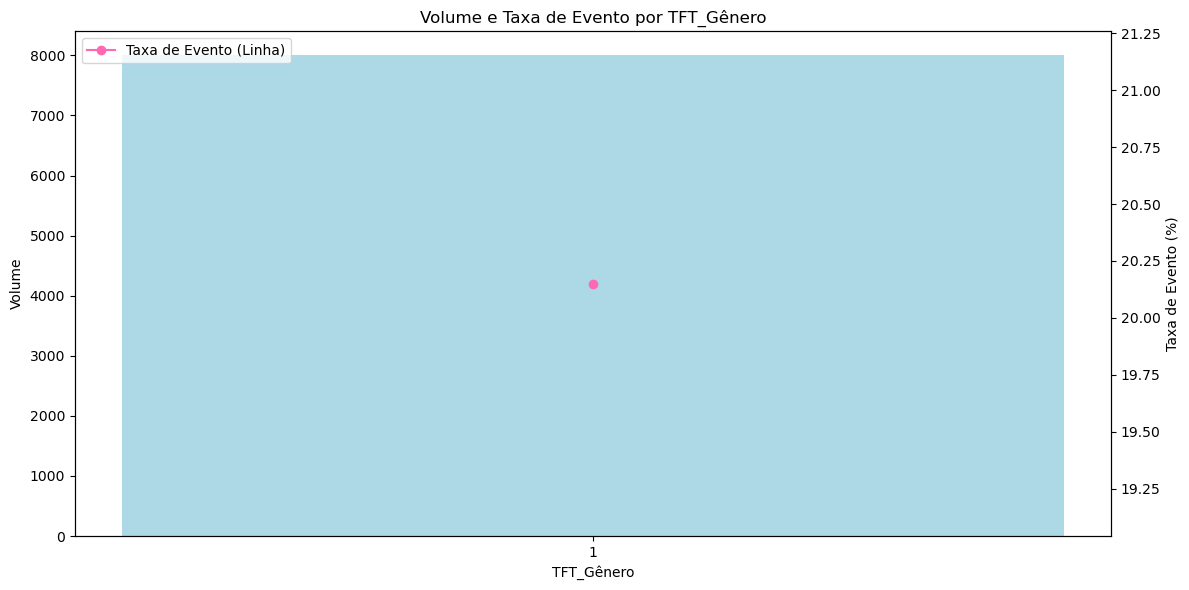

In [25]:
# Avaliar a quantidade de categorias
var = variaveis_categorizar[5]
nome_tft = 'TFT_' + var
result = categorize_with_decision_tree(df1_treino, n_categories=2, target='Target', numeric_var=var)
df1_aux = apply_tree_bins(df1_treino, result, numeric_var=var)

results = analyze_variable(df1_aux, nome_tft, "Target")

# Aplicar a quantidade de categorias escolhida
df1_treino = apply_tree_bins(df1_treino, result, numeric_var=var)
df1_teste = apply_tree_bins(df1_teste, result, numeric_var=var)

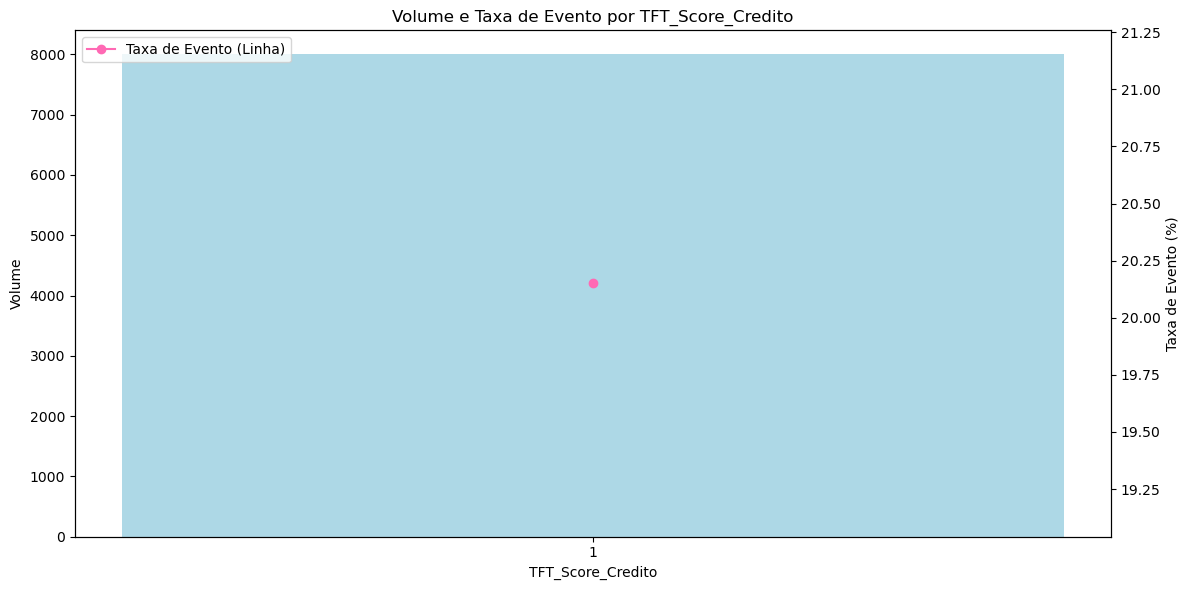

In [26]:
# Avaliar a quantidade de categorias
var = variaveis_categorizar[6]
nome_tft = 'TFT_' + var
result = categorize_with_decision_tree(df1_treino, n_categories=1, target='Target', numeric_var=var)
df1_aux = apply_tree_bins(df1_treino, result, numeric_var=var)

results = analyze_variable(df1_aux, nome_tft, "Target")

# Aplicar a quantidade de categorias escolhida
df1_treino = apply_tree_bins(df1_treino, result, numeric_var=var)
df1_teste = apply_tree_bins(df1_teste, result, numeric_var=var)

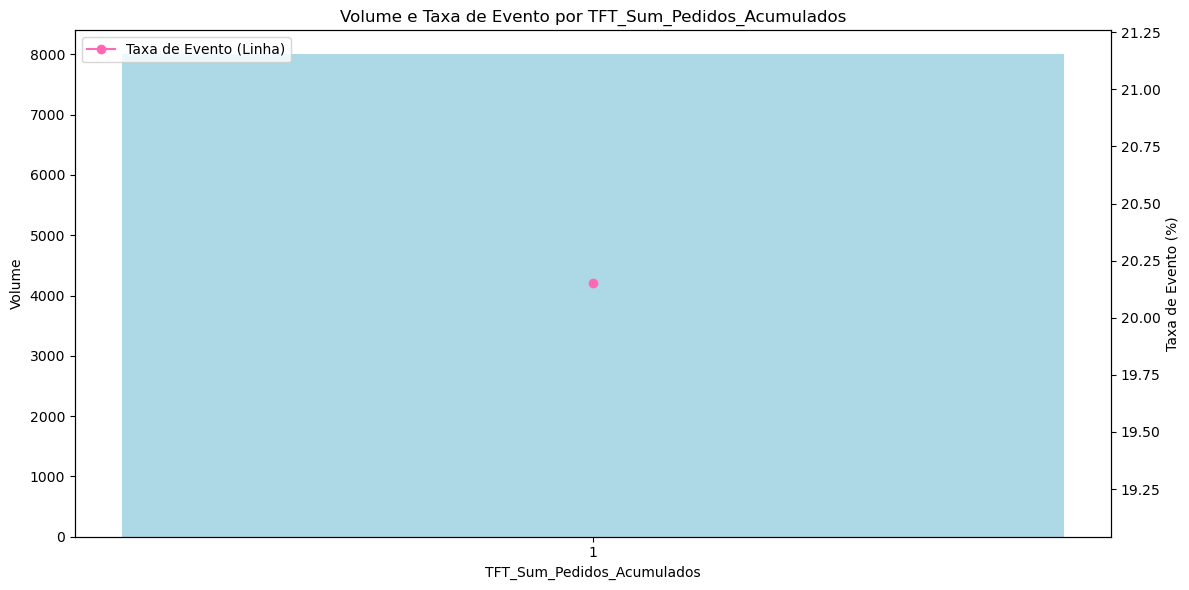

In [27]:
# Avaliar a quantidade de categorias
var = variaveis_categorizar[7]
nome_tft = 'TFT_' + var
result = categorize_with_decision_tree(df1_treino, n_categories=1, target='Target', numeric_var=var)
df1_aux = apply_tree_bins(df1_treino, result, numeric_var=var)

results = analyze_variable(df1_aux, nome_tft, "Target")

# Aplicar a quantidade de categorias escolhida
df1_treino = apply_tree_bins(df1_treino, result, numeric_var=var)
df1_teste = apply_tree_bins(df1_teste, result, numeric_var=var)

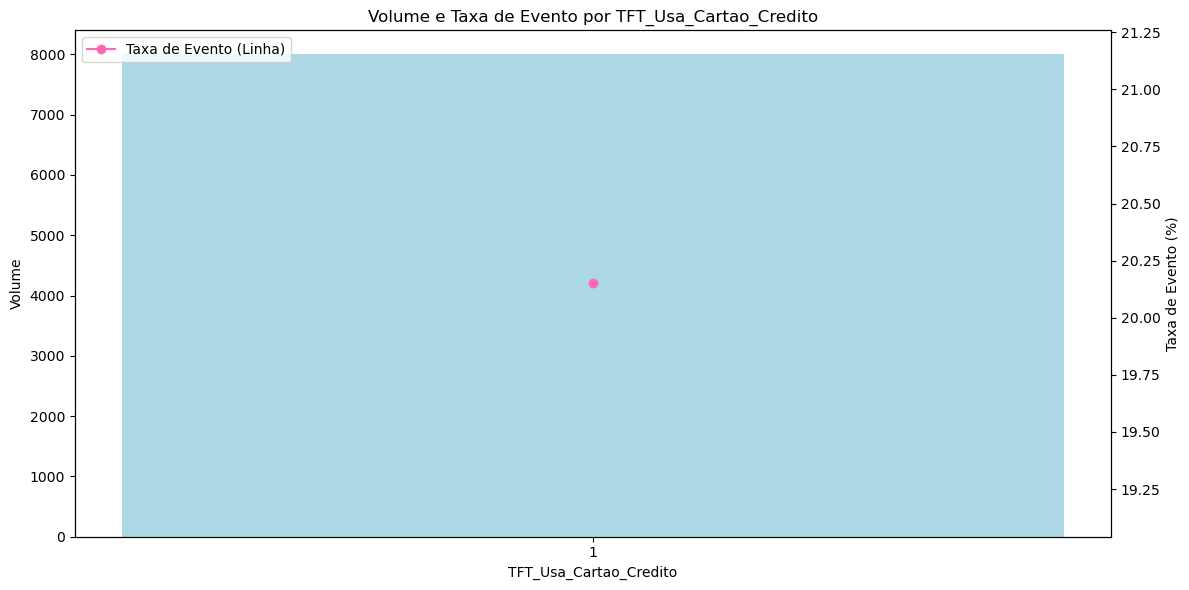

In [28]:
# Avaliar a quantidade de categorias
var = variaveis_categorizar[8]
nome_tft = 'TFT_' + var
result = categorize_with_decision_tree(df1_treino, n_categories=1, target='Target', numeric_var=var)
df1_aux = apply_tree_bins(df1_treino, result, numeric_var=var)

results = analyze_variable(df1_aux, nome_tft, "Target")

# Aplicar a quantidade de categorias escolhida
df1_treino = apply_tree_bins(df1_treino, result, numeric_var=var)
df1_teste = apply_tree_bins(df1_teste, result, numeric_var=var)

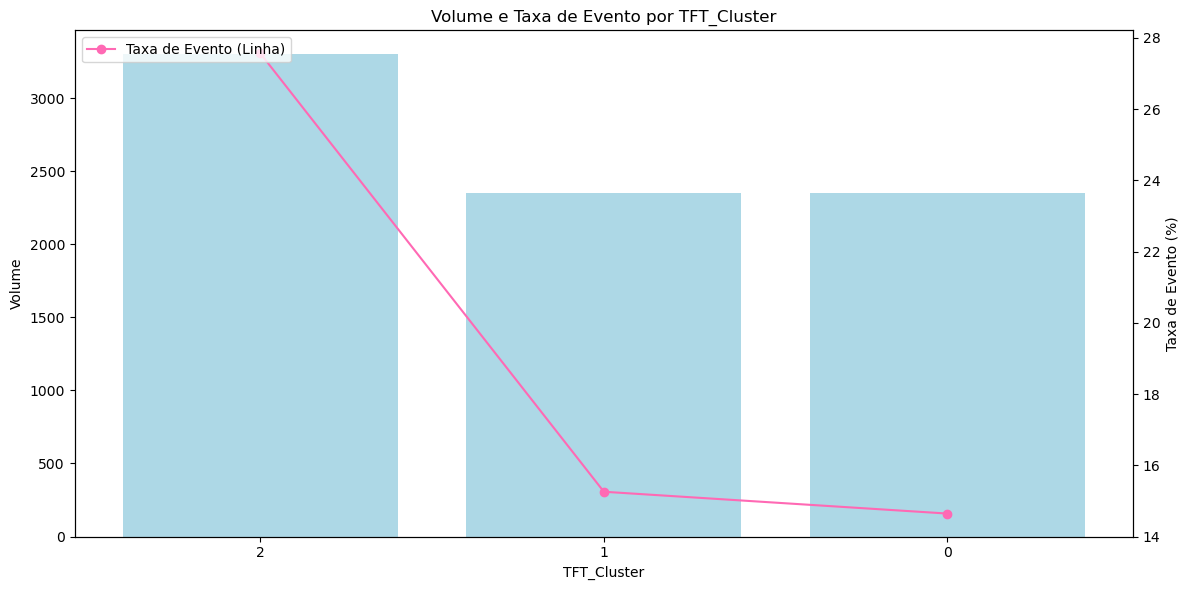

In [29]:
# Avaliar a quantidade de categorias
var = variaveis_categorizar[9]
nome_tft = 'TFT_' + var
result = categorize_with_decision_tree(df1_treino, n_categories=3, target='Target', numeric_var=var)
df1_aux = apply_tree_bins(df1_treino, result, numeric_var=var)

results = analyze_variable(df1_aux, nome_tft, "Target")

# Aplicar a quantidade de categorias escolhida
df1_treino = apply_tree_bins(df1_treino, result, numeric_var=var)
df1_teste = apply_tree_bins(df1_teste, result, numeric_var=var)

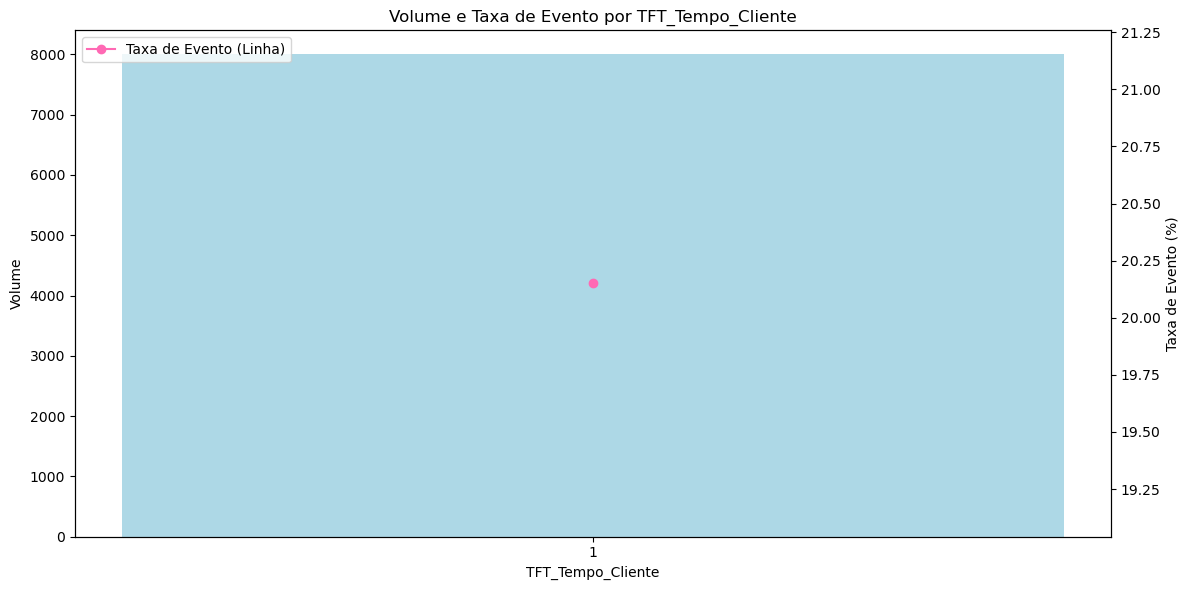

In [30]:
# Avaliar a quantidade de categorias
var = variaveis_categorizar[10]
nome_tft = 'TFT_' + var
result = categorize_with_decision_tree(df1_treino, n_categories=1, target='Target', numeric_var=var)
df1_aux = apply_tree_bins(df1_treino, result, numeric_var=var)

results = analyze_variable(df1_aux, nome_tft, "Target")

# Aplicar a quantidade de categorias escolhida
df1_treino = apply_tree_bins(df1_treino, result, numeric_var=var)
df1_teste = apply_tree_bins(df1_teste, result, numeric_var=var)

In [31]:
# Ajuste no tipo de variável
lista_onehot = ["TFT_" + variavel for variavel in variaveis_categorizar]
for var in lista_onehot:
  df1_treino[var] = df1_treino[var].astype(float)
  df1_teste[var] = df1_teste[var].astype(float)

import pickle
from sklearn.preprocessing import OneHotEncoder

X = df1_treino.drop(axis=1,columns=['Target'])

print('Lista de vars para OneHot Encoding: ',lista_onehot)

# Instanciando o encoder
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore',dtype=np.int32)
# Aplicando o one-hot encoding
encoded_data = encoder.fit_transform(df1_treino[lista_onehot])
encoded_cols = encoder.get_feature_names_out(lista_onehot)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_cols, index=df1_treino.index)

df_train_03 = pd.concat([df1_treino.drop(lista_onehot, axis=1), encoded_df], axis=1)

# Salva o encoder e a lista de colunas em um arquivo .pkl
data_to_serialize = {
    'encoder': encoder,
    'columns': lista_onehot
}

Lista de vars para OneHot Encoding:  ['TFT_Qte_Categorias', 'TFT_Programa_Fidelidade', 'TFT_Idade', 'TFT_Estado', 'TFT_Limite_Credito_Mercado', 'TFT_Gênero', 'TFT_Score_Credito', 'TFT_Sum_Pedidos_Acumulados', 'TFT_Usa_Cartao_Credito', 'TFT_Cluster', 'TFT_Tempo_Cliente']


In [32]:
# Suponha test_df como sua base de teste
encoded_data_test = encoder.transform(df1_teste[lista_onehot])
encoded_cols_test = encoder.get_feature_names_out(lista_onehot)
encoded_df_test = pd.DataFrame(encoded_data_test, columns=encoded_cols_test, index=df1_teste.index)

df1_teste = pd.concat([df1_teste.drop(lista_onehot, axis=1), encoded_df_test], axis=1)

X = df_train_03.drop(axis=1,columns=['Target'])

lista_features_rl = list(X.columns)

In [33]:
import pandas as pd
import statsmodels.api as sm

def logistic_regression_with_scorecard(data, target_var, features):

    data = data[features+[target_var]].copy()

    # Adicionando uma constante ao dataset (intercepto)
    data = sm.add_constant(data)

    # Ajustando o modelo de regressão logística
    model = sm.Logit(data[target_var], data[features + ['const']]).fit()
    # model = sm.Logit(data[target_var], data[features]).fit()

    # Coletando p-valores e estatísticas de Wald
    summary = model.summary2().tables[1]
    summary['Wald'] = summary['z']**2
    scorecard = summary[['Coef.', 'P>|z|', 'Wald']]
    scorecard.columns = ['Beta Coefficient', 'P-Value', 'Wald Statistic']
    scorecard = scorecard.sort_values(by='Wald Statistic', ascending=False)

    return model, scorecard

model, scorecard = logistic_regression_with_scorecard(df_train_03, 'Target', lista_features_rl)
scorecard

Optimization terminated successfully.
         Current function value: 0.405012
         Iterations 7


,Beta Coefficient,P-Value,Wald Statistic
const,-3.601612,7.963322e-299,1365.124147
TFT_Idade_1.0,1.563504,2.703006e-120,543.877726
TFT_Qte_Categorias_1.0,1.697912,1.884314e-117,530.808050
TFT_Estado_1.0,0.571009,1.396436e-19,81.949005
TFT_Cluster_2.0,0.241412,2.678069e-03,9.014768
TFT_Cluster_1.0,0.073228,4.093249e-01,0.680761


In [34]:
lista = pd.DataFrame(scorecard[scorecard['P-Value'] <= 0.05].reset_index()).rename(columns={'index':'variable'}).variable.to_list()
try:
    lista.remove('const')
except:
    pass

abt_new = df_train_03[lista]
abt_new = pd.concat((abt_new,y_train),axis=1)
abt_test_new = df1_teste[lista]
abt_test_new = pd.concat((abt_test_new,y_test),axis=1)

model, scorecard = logistic_regression_with_scorecard(abt_new, 'Target', abt_new.drop(columns='Target').columns.to_list())
scorecard

Optimization terminated successfully.
         Current function value: 0.405055
         Iterations 7


,Beta Coefficient,P-Value,Wald Statistic
const,-3.564413,0.000000e+00,1715.118228
TFT_Idade_1.0,1.562960,2.961699e-120,543.695263
TFT_Qte_Categorias_1.0,1.697788,1.895963e-117,530.795748
TFT_Estado_1.0,0.570896,1.412967e-19,81.925746
TFT_Cluster_2.0,0.204740,2.162257e-03,9.406431


In [35]:
abt_train_t01 = abt_new.drop(columns='Target').copy()
abt_teste_t01 = abt_test_new.drop(columns='Target').copy()

abt_train_t01['const'] = 1.0
abt_teste_t01['const'] = 1.0

abt_train_t01['Score_1'] = model.predict(abt_train_t01).round(4)
abt_teste_t01['Score_1'] = model.predict(abt_teste_t01).round(4)

abt_train_t01['Score_0'] = 1 - abt_train_t01['Score_1']
abt_teste_t01['Score_0'] = 1 - abt_teste_t01['Score_1']

abt_train_t01 = pd.concat((abt_train_t01,y_train),axis=1)
abt_teste_t01 = pd.concat((abt_teste_t01,y_test),axis=1)

In [36]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix

def calculate_metrics(train_df, test_df, score_column, target_column,bins=10):
    def compute_metrics(df, score_column, target_column):
        df_sorted = df.sort_values(by=score_column, ascending=False)

        # Calcular KS
        df_sorted['cum_good'] = (1 - df_sorted[target_column]).cumsum() / (1 - df_sorted[target_column]).sum()
        df_sorted['cum_bad'] = df_sorted[target_column].cumsum() / df_sorted[target_column].sum()
        df_sorted['ks'] = np.abs(df_sorted['cum_good'] - df_sorted['cum_bad'])
        ks_statistic = df_sorted['ks'].max()

        # Calcular AUC
        auc_value = roc_auc_score(df_sorted[target_column], df_sorted[score_column])

        # Calcular Gini
        gini = 2 * auc_value - 1

        # Calcular acurácia
        predicted_labels = df_sorted[score_column] > 0.5 # Defina o limite apropriado
        accuracy = accuracy_score(df_sorted[target_column], predicted_labels)
        
        # Dividir o score em 10 faixas
        df_sorted['decile'] = pd.qcut(df_sorted[score_column], bins, labels=False, duplicates='drop')

        # Criar tabela detalhada
        table = df_sorted.groupby('decile').agg(
            min_score=pd.NamedAgg(column=score_column, aggfunc='min'),
            max_score=pd.NamedAgg(column=score_column, aggfunc='max'),
            event_rate=pd.NamedAgg(column=target_column, aggfunc='mean'),
            volume=pd.NamedAgg(column=target_column, aggfunc='size')
        ).reset_index()

        return ks_statistic, auc_value, gini, accuracy, table

    ks_train, auc_train, gini_train, accuracy_train, table_train = compute_metrics(train_df, score_column, target_column)
    ks_test, auc_test, gini_test, accuracy_test, table_test = compute_metrics(test_df, score_column, target_column)


    # Plotando o gráfico de barras para Event Rate por Decil
    barWidth = 0.3
    r1 = np.arange(len(table_train))
    r2 = [x + barWidth for x in r1]

    plt.bar(r1, table_train['event_rate'], color='lightblue', width=barWidth, label='Train')
    plt.bar(r2, table_test['event_rate'], color='royalblue', width=barWidth, label='Test')

    plt.xlabel('Decile')
    plt.ylabel('Event Rate')
    plt.title('Event Rate by Decile')
    plt.xticks([r + barWidth for r in range(len(table_train))], table_train['decile'])
    plt.legend()
    plt.show()

    # Criando DataFrame para as métricas
    metrics_df = pd.DataFrame({
        'Metric': ['KS', 'AUC', 'Gini', 'Acurácia'],
        'Train Value': [ks_train, auc_train, gini_train, accuracy_train],
        'Test Value': [ks_test, auc_test, gini_test, accuracy_test]
    })

    return metrics_df, table_train, table_test

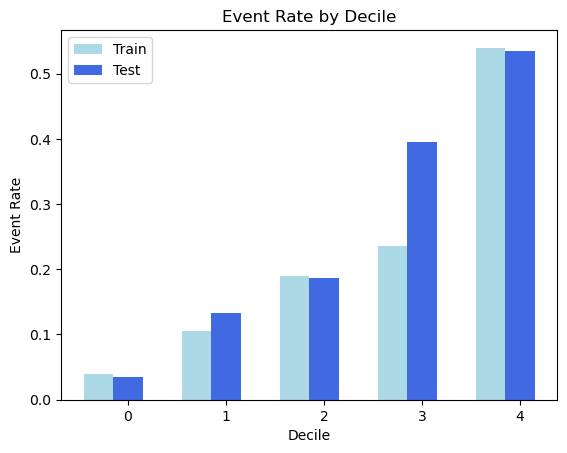

,Metric,Train Value,Test Value
0,KS,0.449546,0.458823
1,AUC,0.794937,0.791626
2,Gini,0.589873,0.583253
3,Acurácia,0.817375,0.807500


In [37]:
metrics, ord_score_train, ord_score_test = calculate_metrics(abt_train_t01, abt_teste_t01, 'Score_1', 'Target',bins=5)
metrics

In [38]:
ord_score_train

,decile,min_score,max_score,event_rate,volume
0,0,0.0275,0.0477,0.039915,2355
1,1,0.0579,0.1339,0.104644,1529
2,2,0.1423,0.2149,0.190270,1850
3,3,0.2269,0.2514,0.236364,715
4,4,0.4247,0.6159,0.539652,1551


In [39]:
ord_score_test

,decile,min_score,max_score,event_rate,volume
0,0,0.0275,0.0477,0.035222,653
1,1,0.1191,0.1339,0.132832,399
2,2,0.1423,0.2149,0.187097,465
3,3,0.2269,0.4247,0.395833,144
4,4,0.4753,0.6159,0.533923,339


In [40]:
abt_train_t01.head()

,TFT_Idade_1.0,TFT_Qte_Categorias_1.0,TFT_Estado_1.0,TFT_Cluster_2.0,const,Score_1,Score_0,Target
7389,0,0,1,0,1.0,0.0477,0.9523,0
9275,1,1,1,1,1.0,0.6159,0.3841,0
2995,0,1,0,1,1.0,0.1595,0.8405,0
5316,0,1,1,0,1.0,0.2149,0.7851,0
356,1,0,1,1,1.0,0.2269,0.7731,0


In [41]:
# Obtendo as probabilidades de 1 para o conjunto de treinamento
probabilidade_1_treino = abt_train_t01['Score_1']

# Obtendo as probabilidades de 1 para o conjunto de teste
probabilidade_1_teste = abt_teste_t01['Score_1']


In [42]:
probabilidade_1_treino

7389    0.0477
9275    0.6159
2995    0.1595
5316    0.2149
356     0.2269
         ...  
9225    0.0579
4859    0.2149
3264    0.0275
9845    0.0477
2732    0.6159
Name: Score_1, Length: 8000, dtype: float64

In [43]:
probabilidade_1_teste

9394    0.2149
898     0.1339
2398    0.5664
5906    0.1339
2343    0.0477
         ...  
1037    0.0275
2899    0.0275
9549    0.0477
2740    0.2149
6690    0.2149
Name: Score_1, Length: 2000, dtype: float64

In [44]:
import pandas as pd

# Combina as probabilidades de treino e teste em uma única série
probabilidade_1 = pd.concat([probabilidade_1_treino, probabilidade_1_teste])

# Atribui a série combinada ao DataFrame df_churn com o nome de coluna 'Probabilidade_1'
df_churn['Probabilidade_1'] = probabilidade_1.values

df_churn.head()


,ClientId,DataExtracao,Score_Credito,Estado,Gênero,Idade,Tempo_Cliente,Limite_Credito_Mercado,Qte_Categorias,Usa_Cartao_Credito,Programa_Fidelidade,Sum_Pedidos_Acumulados,DataUltimaTransacao,DiasDesdeUltTransacao,Target,Cluster,TARGET,Probabilidade_1
0,345568,2019-06-30,619,São Paulo,Feminino,42,2,0.0000,1,1,1,422.287000,2019-09-14,46,1,1,1,0.0477
1,345569,2019-06-30,608,Rio de Janeiro,Feminino,41,1,838.0786,1,0,1,468.927417,2019-10-05,25,0,1,0,0.6159
2,345570,2019-06-30,502,São Paulo,Feminino,42,8,1596.6080,3,1,0,474.714875,2019-08-20,71,1,3,1,0.1595
3,345571,2019-06-30,699,São Paulo,Feminino,39,1,0.0000,2,0,0,390.944292,2019-10-21,9,0,1,0,0.2149
4,345572,2019-06-30,850,Rio de Janeiro,Feminino,43,2,1255.1082,1,1,1,329.517083,2019-10-26,4,0,1,0,0.2269


In [45]:
df_churn.iloc[9394]

ClientId                        354962
DataExtracao                2019-06-30
Score_Credito                      597
Estado                    Minas Gerais
Gênero                        Feminino
Idade                               35
Tempo_Cliente                        8
Limite_Credito_Mercado       1311.0104
Qte_Categorias                       1
Usa_Cartao_Credito                   1
Programa_Fidelidade                  1
Sum_Pedidos_Acumulados      803.552792
DataUltimaTransacao         2019-10-10
DiasDesdeUltTransacao               20
Target                               0
Cluster                              2
TARGET                               0
Probabilidade_1                 0.2149
Name: 9394, dtype: object

In [47]:
# Exportar o DataFrame df_churn para um arquivo Excel
df_churn.to_excel('../df_churn_com_probabilidades.xlsx', index=False)